#  Feature Selection

#### Feature selection is the process of reducing the number of input variables when developing a predictive model.It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

Feature selection is also related to dimensionally reduction techniques in that both methods seek fewer input variables to a predictive model. The difference is that feature selection selects features to keep or remove from the dataset, whereas dimensionality reduction creates a projection of the data resulting in entirely new input features. As such, dimensionality reduction is an alternate to feature selection rather than a type of feature selection.

We can summarize feature selection as follows.
Feature Selection: Select a subset of input features from the dataset which are relevant to the target variable.      
- Unsupervised: The feature selection method that does not use the target variable (e.g., remove redundant variables).
 - Correlation
- Supervised: The Feature Selection methods that use the target variable (e.g., remove irrelevant variables).
 - Wrapper: Search for well-performing subsets of features.
   - Recursive Feature Elimination (RFE)
   - Genetic Algorithm
 - Filter: Select subsets of features based on their relationship with the target.
   - Pearson’s Coefficient
   - Chi Squared
   - ANOVA Coefficient
 - Intrinsic: Algorithms that perform automatic feature selection during training.
   - Decision Trees
   - Lasso Regularization
Dimensionality Reduction: Project input data into a lower-dimensional feature space.


#### Selecting between Different Feature Selection Methods

<img src="https://machinelearningmastery.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png"  />

In [1]:
#!pip install keras
#!pip install --upgrade tensorflow
#!pip install --upgrade tensorflow-gpu

In [2]:
!pip install shap
!pip install sklearn-genetic


     |████████████████████████████████| 571 kB 25.1 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 13.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 56.4 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 58.9 MB/s eta 0:00:01
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9
     |████████████████████████████████| 128 kB 29.4 MB/s eta 0:00:01
     |████████████████████████████████| 160 kB 57.1 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 15.3 MB/s eta 0:00:01


In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_97429b5b216f41ad85d44339da02aaf7 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='zndXWQ69KPeKzfInlJAMbXFztr7JSxRO0Nh8XxHZOIr7',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_97429b5b216f41ad85d44339da02aaf7.get_object(Bucket='featureselection-donotdelete-pr-pladbu2buictbb',Key='data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)


Unnamed: 0  symboling normalized-losses         make fuel-type aspiration  \
0           0          3                 ?  alfa-romero       gas        std   
1           1          3                 ?  alfa-romero       gas        std   
2           2          1                 ?  alfa-romero       gas        std   
3           3          2               164         audi       gas        std   
4           4          2               164         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  ...  engine-size  \
0          two  convertible          rwd           front  ...          130   
1          two  convertible          rwd           front  ...          130   
2          two    hatchback          rwd           front  ...          152   
3         four        sedan          fwd           front  ...          109   
4         four        sedan          4wd           front  ...          136   

   fuel-system  bore  stroke  compression-ratio horsepower peak-rpm  city-mpg  \
0         mpfi  3.47    2.68                9.0        111     5000        21   
1         mpfi  3.47    2.68                9.0        111     5000        21   
2         mpfi  2.68    3.47                9.0        154     5000        19   
3         mpfi  3.19    3.40               10.0        102     5500        24   
4         mpfi  3.19    3.40                8.0        115     5500        18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 27 columns]

In [4]:
#credentials_3.head()

In [5]:
#with open("imports-85.names") as f:
#    print(f.read())

In [6]:
data.head()

Unnamed: 0  symboling normalized-losses         make fuel-type aspiration  \
0           0          3                 ?  alfa-romero       gas        std   
1           1          3                 ?  alfa-romero       gas        std   
2           2          1                 ?  alfa-romero       gas        std   
3           3          2               164         audi       gas        std   
4           4          2               164         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  ...  engine-size  \
0          two  convertible          rwd           front  ...          130   
1          two  convertible          rwd           front  ...          130   
2          two    hatchback          rwd           front  ...          152   
3         four        sedan          fwd           front  ...          109   
4         four        sedan          4wd           front  ...          136   

   fuel-system  bore  stroke  compression-ratio horsepower peak-rpm  city-mpg  \
0         mpfi  3.47    2.68                9.0        111     5000        21   
1         mpfi  3.47    2.68                9.0        111     5000        21   
2         mpfi  2.68    3.47                9.0        154     5000        19   
3         mpfi  3.19    3.40               10.0        102     5500        24   
4         mpfi  3.19    3.40                8.0        115     5500        18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 27 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         205 non-null    int64  
 1   symboling          205 non-null    int64  
 2   normalized-losses  205 non-null    object 
 3   make               205 non-null    object 
 4   fuel-type          205 non-null    object 
 5   aspiration         205 non-null    object 
 6   num-of-doors       205 non-null    object 
 7   body-style         205 non-null    object 
 8   drive-wheels       205 non-null    object 
 9   engine-location    205 non-null    object 
 10  wheel-base         205 non-null    float64
 11  length             205 non-null    float64
 12  width              205 non-null    float64
 13  height             205 non-null    float64
 14  curb-weight        205 non-null    int64  
 15  engine-type        205 non-null    object 
 16  num-of-cylinders   205 non

In [8]:
data=data.drop("Unnamed: 0",axis=1)

In [9]:
import numpy as np

In [10]:
data=data.replace(to_replace ="?",
                 value =np.nan)

In [11]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [12]:
mean_value=data['normalized-losses'].astype(float).mean()


In [13]:
data['normalized-losses'].fillna(value=mean_value, inplace=True)

In [14]:
data=data.dropna()

In [15]:
data.isnull().sum()
data.shape

(193, 26)

In [16]:
convert_dict = {"normalized-losses":int,
                "bore":float
                ,"stroke":float
                ,"horsepower":int
                ,"peak-rpm":int
                ,"price":int } 

In [17]:
data= data.astype(convert_dict)  

*Feature Selection between numerical input and output features.*

In [18]:
numerical_data=data[["normalized-losses","wheel-base","length","width","height","curb-weight","bore","stroke","compression-ratio",
"horsepower","peak-rpm","city-mpg","highway-mpg","price"]]

In [19]:
numerical_data.head()

normalized-losses  wheel-base  length  width  height  curb-weight  bore  \
0                122        88.6   168.8   64.1    48.8         2548  3.47   
1                122        88.6   168.8   64.1    48.8         2548  3.47   
2                122        94.5   171.2   65.5    52.4         2823  2.68   
3                164        99.8   176.6   66.2    54.3         2337  3.19   
4                164        99.4   176.6   66.4    54.3         2824  3.19   

   stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  \
0    2.68                9.0         111      5000        21           27   
1    2.68                9.0         111      5000        21           27   
2    3.47                9.0         154      5000        19           26   
3    3.40               10.0         102      5500        24           30   
4    3.40                8.0         115      5500        18           22   

   price  
0  13495  
1  16500  
2  16500  
3  13950  
4  17450

# Filter Methods

### Filter methods are generally used as a preprocessing step. The selection of features is independent of any machine learning algorithms. Instead, features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable.

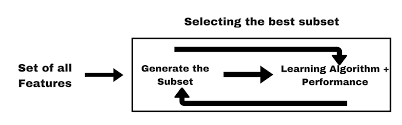

## Pearson's Correlation Coefficient

- #### Pearson’s Correlation method is used for finding the association between the continuous features and the class feature.
- #### If two features are highly correlated to each other, one of those features can be dropped.
- #### If any feature is highly correlated to the target variable, that feature is important.
- #### We can use the Corr() function to calculate the Correlation score and heatmap to visualize it.
- #### To filter out we can set threshold value, by default the value lies between 80 to 85 percentage.


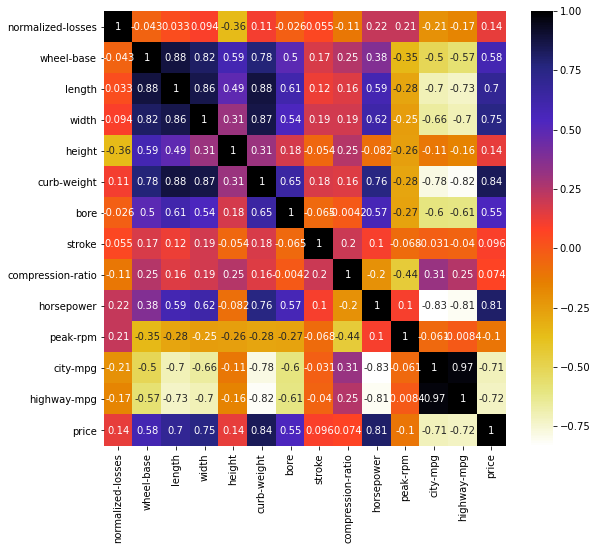

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(9,8))
sns.heatmap(numerical_data.corr(),annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [21]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [22]:
X1=numerical_data.drop("price",axis=1)
y1=numerical_data["price"]

In [23]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1,
    y1,
    test_size=0.3,
    random_state=0)

X1_train.shape, X1_test.shape

((135, 13), (58, 13))

In [24]:
corr_features1 = correlation(X1_train, 0.80)
len(set(corr_features1))

5

In [25]:
corr_features1

{'city-mpg', 'curb-weight', 'highway-mpg', 'length', 'width'}

In [26]:
selected_features1=set(numerical_data.columns)-corr_features1

In [27]:
selected_features1

{'bore',
 'compression-ratio',
 'height',
 'horsepower',
 'normalized-losses',
 'peak-rpm',
 'price',
 'stroke',
 'wheel-base'}

**Method 2**

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

In [29]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X1,
    y1,
    test_size=0.3,
    random_state=0)

In [30]:
X2_train.shape

(135, 13)

In [31]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k=9)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 2.847287
Feature 1: 79.461322
Feature 2: 125.073479
Feature 3: 156.655033
Feature 4: 8.995377
Feature 5: 262.941052
Feature 6: 63.668061
Feature 7: 0.339500
Feature 8: 0.172803
Feature 9: 251.227215
Feature 10: 0.729723
Feature 11: 117.240170
Feature 12: 124.105745


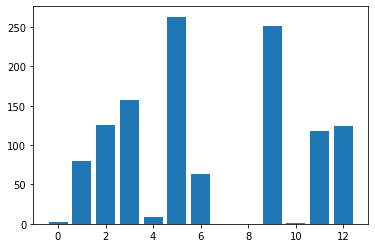

In [32]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X2_train, y2_train, X2_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [33]:
print(fs.get_support())

[False  True  True  True  True  True  True False False  True False  True
  True]


Feature selection using Categorical input data and numerical output data

In [34]:
#label Encoding
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()


In [35]:
data["make"]= label_encoder.fit_transform(data["make"])
data["symboling"]= label_encoder.fit_transform(data["symboling"])
data["fuel-type"]= label_encoder.fit_transform(data["fuel-type"])
data["aspiration"]= label_encoder.fit_transform(data["aspiration"]) 
data["num-of-doors"]= label_encoder.fit_transform(data["num-of-doors"]) 
data["body-style"]= label_encoder.fit_transform(data["body-style"]) 
data["drive-wheels"]= label_encoder.fit_transform(data["drive-wheels"]) 
data["engine-location"]= label_encoder.fit_transform(data["engine-location"]) 
data["engine-type"]= label_encoder.fit_transform(data["engine-type"]) 
data["fuel-system"]= label_encoder.fit_transform(data["fuel-system"]) 

In [36]:
data["num-of-cylinders"]= label_encoder.fit_transform(data["num-of-cylinders"]) 
data.head()

symboling  normalized-losses  make  fuel-type  aspiration  num-of-doors  \
0          5                122     0          1           0             1   
1          5                122     0          1           0             1   
2          3                122     0          1           0             1   
3          4                164     1          1           0             0   
4          4                164     1          1           0             0   

   body-style  drive-wheels  engine-location  wheel-base  ...  engine-size  \
0           0             2                0        88.6  ...          130   
1           0             2                0        88.6  ...          130   
2           2             2                0        94.5  ...          152   
3           3             1                0        99.8  ...          109   
4           3             0                0        99.4  ...          136   

   fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0            4  3.47    2.68                9.0         111      5000   
1            4  3.47    2.68                9.0         111      5000   
2            4  2.68    3.47                9.0         154      5000   
3            4  3.19    3.40               10.0         102      5500   
4            4  3.19    3.40                8.0         115      5500   

   city-mpg  highway-mpg  price  
0        21           27  13495  
1        21           27  16500  
2        19           26  16500  
3        24           30  13950  
4        18           22  17450  

[5 rows x 26 columns]

In [37]:
categorical_data=data[["symboling","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","engine-type","fuel-system","num-of-cylinders","price"]]

### **ANOVA**

- #### ANOVA is an acronym for “analysis of variance” and is a parametric statistical hypothesis test for determining whether the means from two or more samples of data (often three or more) come from the same distribution or not.
- #### Importantly, ANOVA is used when one variable is numeric and one is categorical, such as numerical input variables and a classification target variable in a classification task.
- #### The results of this test can be used for feature selection where those features that are independent of the target variable can be removed from the dataset.
- #### The scikit-learn machine library provides an implementation of the ANOVA f-test in the f_classif() function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.


In [38]:
#perform anova test is the predictors are categorical and response is numerical
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [39]:
X3_train,X3_test,y3_train,y3_test=train_test_split(categorical_data.drop("price",axis=1),
                                              data['price'],test_size=0.3,random_state=100)

In [40]:
X3_train.shape

(135, 11)

In [41]:


# feature selection
#def select_features(X_train, y_train, X_test):
	# configure to select all features
#	fvalue_Best = SelectKBest(f_classif, k=8)
#	# learn relationship from training data
#	fvalue_Best.fit(X_train, y_train)
	# transform train input data
#	X_train_fvalue_Best = fvalue_Best.transform(X_train)
	# transform test input data
#	X_test_fvalue_Best = fvalue_Best.transform(X_test)
#	return X_train_fvalue_Best, X_test_fvalue_Best, fvalue_Best

In [42]:
# feature selection
#X_train_fs, X_test_fs, fs = select_features(X3_train, y3_train, X3_test)
# what are scores for the features
#for i in range(len(fvalue_Best.scores_)):
#	print('Feature %d: %f' % (i, fvalue_Best.scores_[i]))
# plot the scores
#pyplot.bar([i for i in range(len(fvalue_Best.scores_))], fvalue_Best.scores_)
#plt.figure(figsize=(9,15))
#pyplot.show()

In [43]:
#print(fvalue_Best.get_support())

In [44]:
fvalue_Best = SelectKBest(f_classif,k=7)
X_kbest = fvalue_Best.fit_transform(X3_train, y3_train)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


Feature 0: 1.196073
Feature 1: 1.529661
Feature 2: 1.502400
Feature 3: 2.950933
Feature 4: 1.412800
Feature 5: 4.370311
Feature 6: 5.997333
Feature 7: inf
Feature 8: 5.860800
Feature 9: 4.290085
Feature 10: inf


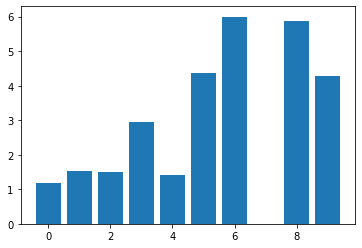

<Figure size 648x1080 with 0 Axes>

In [45]:
for i in range(len(fvalue_Best.scores_)):

  print('Feature %d: %f' % (i, fvalue_Best.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fvalue_Best.scores_))], fvalue_Best.scores_)
plt.figure(figsize=(9,15))
pyplot.show()

In [46]:
support_anova=fvalue_Best.get_support()

In [47]:
support_anova

array([False, False, False,  True, False,  True,  True,  True,  True,
        True,  True])

In [48]:
a=[]
for i in range(11):
    if support_anova[i]==True:
        a.append(i)

In [49]:
selected_features2= categorical_data.columns[a].values

In [50]:
selected_features2

array(['aspiration', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type', 'fuel-system', 'num-of-cylinders'], dtype=object)

## Kendall's

- #### In this Test we calculate the collinearity between two variables with a monotonic function.
- #### Monotonic functions means that the magnitude of variables increase/decrease over a interval.
- #### The value of kendall lies between -1 to 1 and it is best suited for discrete data.
- #### If two features are highly collinear to one and another then one of them can be dropped.
    It is calculated as follows:
	 
		Kendall tau=C-D/C+D
		
	Where C= Sum of Concordant Pairs
		    D= Sum of Discordant Pairs
- #### The kendall tau can be calculated in python using Corr(method=” kendall”) Function.


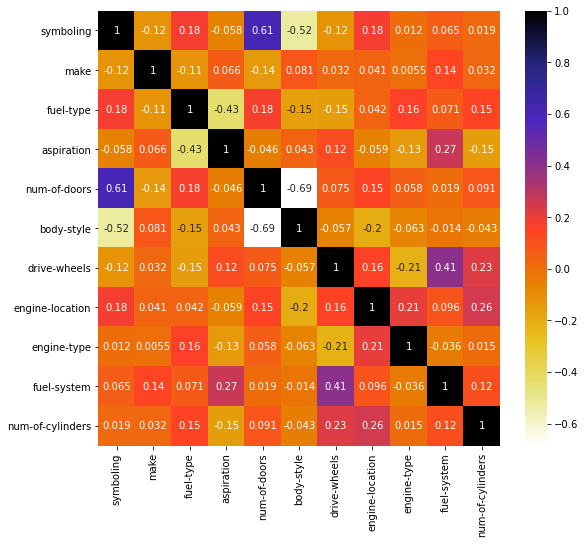

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(9,8))
sns.heatmap(categorical_data.drop("price",axis=1).corr(method="kendall"),annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [52]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def kendall_correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr(method="kendall")
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [53]:
X4=categorical_data.drop("price",axis=1)
y4=categorical_data["price"]

In [54]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = train_test_split(
    X4,
    y4,
    test_size=0.3,
    random_state=0)

In [55]:
corr_features2 = kendall_correlation(X4_train, 0.6)
len(set(corr_features2))
corr_features2

{'body-style', 'num-of-doors'}

In [56]:
selected_features3=set(categorical_data.columns)-corr_features2

In [57]:
selected_features3

{'aspiration',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'fuel-system',
 'fuel-type',
 'make',
 'num-of-cylinders',
 'price',
 'symboling'}

# ***Wrapper Method***

#### Wrappers require some method to search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset. The feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset. It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion. The wrapper methods usually result in better predictive accuracy than filter methods.
#### Let’s, discuss some of these techniques:
- #### Forwarded Feature Selection
- #### Backward Feature Elimination
- #### Exhaustive Feature Selection
- #### Recursive Feature Elimination



### Recursive Feature Elimination

- #### It is easy to configure and effective at selecting those features that are most important in prediction.
- #### There are two important configuration option when using RFE. The choice of the algorithms and number of features.
- #### Technically, RFE is a wrapper-style feature selection algorithm that uses filter-based feature selection internally wrapped by a algorithm.
- #### RFE works by searching a subset of features by starting with all features initially and successfully removing features until a specified number of features remain.
- #### We can use the RFE method of Sklearn library to select features.
- #### The RFECV methods explicitly returns optimal number of features.


In [58]:
X5=data.drop("price",axis=1)
y5=data["price"]

In [59]:
X5_train, X5_test, y5_train, y5_test = train_test_split(
    X5,
    y5,
    test_size=0.3,
    random_state=0)

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFECV
rfc = DecisionTreeRegressor()
rfecv = RFECV(estimator=rfc, step=1, scoring='neg_mean_absolute_error')
rfecv.fit(X5_train,y5_train)

RFECV(estimator=DecisionTreeRegressor(), scoring='neg_mean_absolute_error')

In [61]:
X5_train.shape

(135, 25)

In [62]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 8


In [63]:
print(np.where(rfecv.support_ == False)[0])

X5_train.drop(X5_train.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 0  1  3  4  5  6  7  8 10 12 15 17 18 20 21 22 23]


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [64]:
b=[]
for i in range(25):
    if rfecv.support_[i]==True:
        b.append(i)

In [65]:
selected_features4=data.columns[b].values

In [66]:
selected_features4

array(['make', 'wheel-base', 'width', 'curb-weight', 'engine-type',
       'engine-size', 'stroke', 'highway-mpg'], dtype=object)

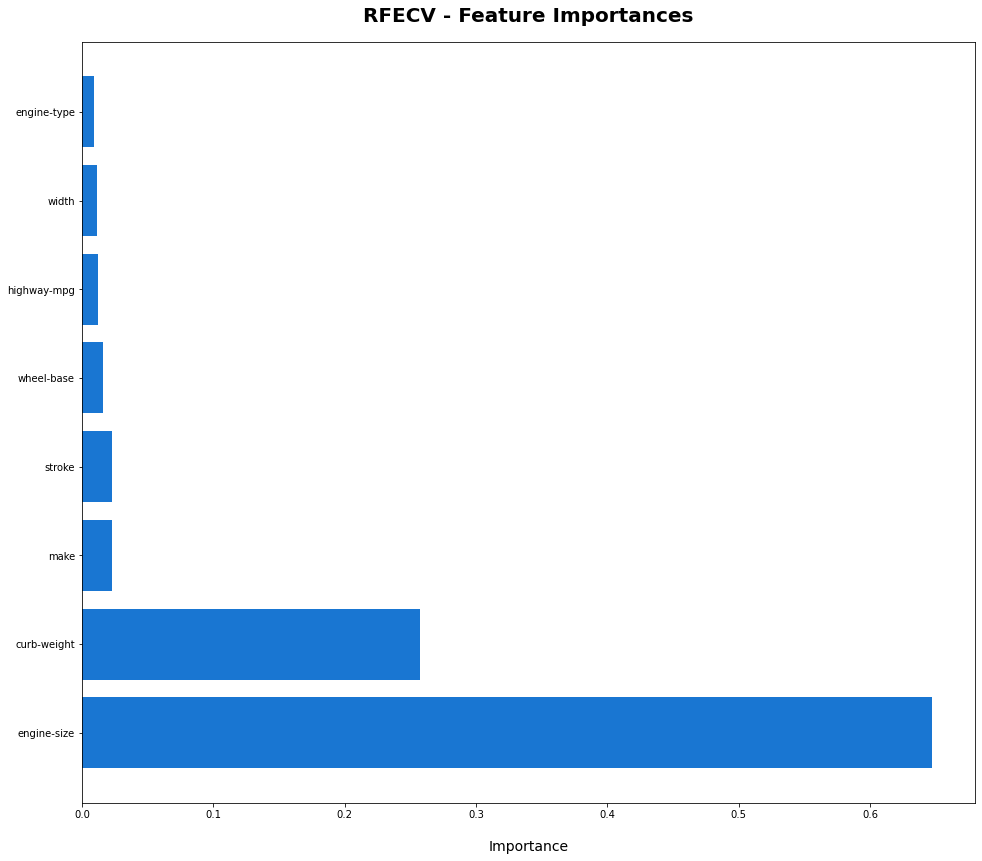

In [67]:
dset = pd.DataFrame()
dset['attr'] = X5_train.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

## Intrinsic Method

#### It is also known as Embedded Methods
#### Embedded methods combine the qualities of filter and wrapper methods. It’s implemented by algorithms that have their own built-in feature selection methods.


### Decision Tree

- #### To give a better intuition, features that are selected at the top of the trees are in general more important than features that are selected at the end nodes of the trees, as generally the top splits lead to bigger information gains.
- #### we can use the RandomForestClassifier for feature selection.
- #### The SelectFromModel method combined with decision tree returns those features whose importance is greater than the mean importance of all the features.


In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [69]:
X6=data.drop("price",axis=1)
y6=data["price"]

In [70]:
X6_train, X6_test, y6_train, y6_test = train_test_split(
    X6,
    y6,
    test_size=0.3,
    random_state=0)

In [71]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X6_train, y6_train)

RandomForestRegressor()

In [72]:
rf.feature_importances_

array([9.56854442e-04, 6.66379129e-03, 1.59667077e-02, 9.80246228e-04,
       1.95188456e-03, 2.85778292e-03, 1.98021090e-03, 2.41980742e-03,
       7.87214714e-05, 4.92523090e-03, 1.22190781e-02, 9.69138161e-03,
       4.49163965e-03, 2.87130270e-01, 1.29586531e-03, 2.06082946e-03,
       5.70753378e-01, 3.05450068e-03, 4.98851569e-03, 6.64439225e-03,
       6.68223328e-03, 3.67647946e-02, 6.05059830e-03, 4.32161686e-03,
       5.06966823e-03])

Text(0.5, 0, 'Random Forest Feature Importance')

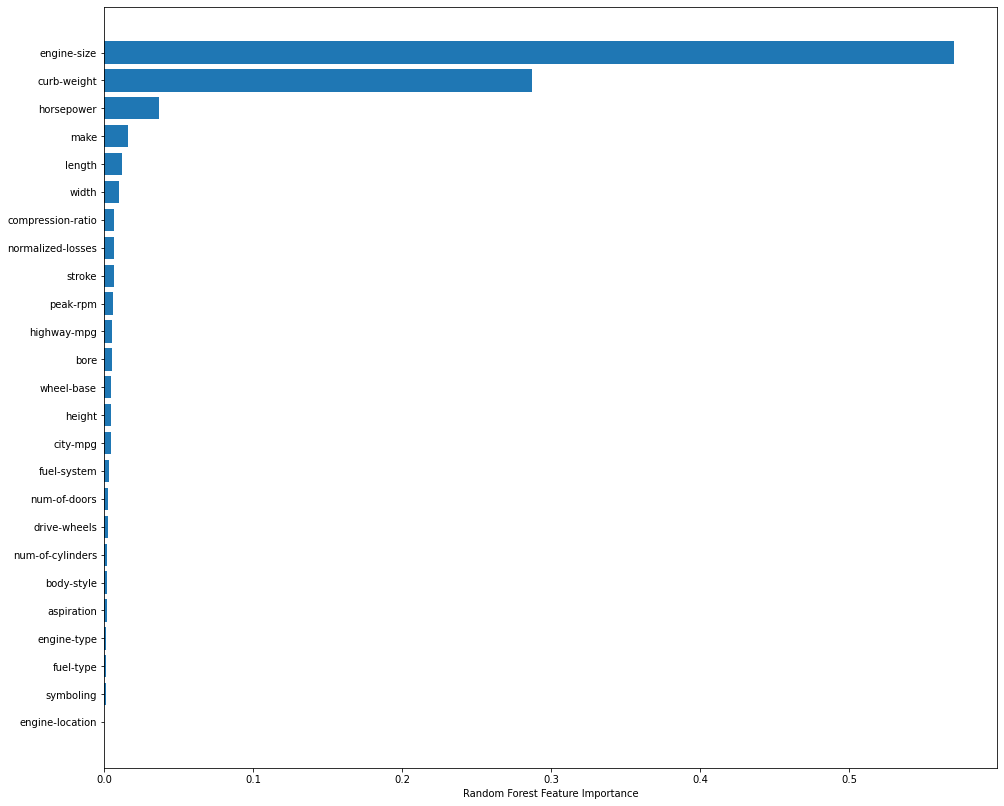

In [73]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(16, 14))
plt.barh(data.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [74]:
sorted_idx

array([ 8,  0,  3, 14,  4,  6, 15,  7,  5, 17, 23, 12,  9, 18, 24, 22, 19,
        1, 20, 11, 10,  2, 21, 13, 16])

## Permutation Based Feature Importance

- #### Permutation feature importance is a model inspection technique that can be used for any fitted estimator when the data is tabular. 
- #### This is especially useful for non-linear or opaque estimators. 
- #### The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled . 
- #### This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature. 
- #### This technique benefits from being model agnostic and can be calculated many times with different permutations of the feature.
- #### The permutation feature importance is the decrease in a model score when a single feature value is randomly shuffled. 

In [75]:
perm_importance = permutation_importance(rf, X6_test, y6_test)

Text(0.5, 0, 'Permutation Importance')

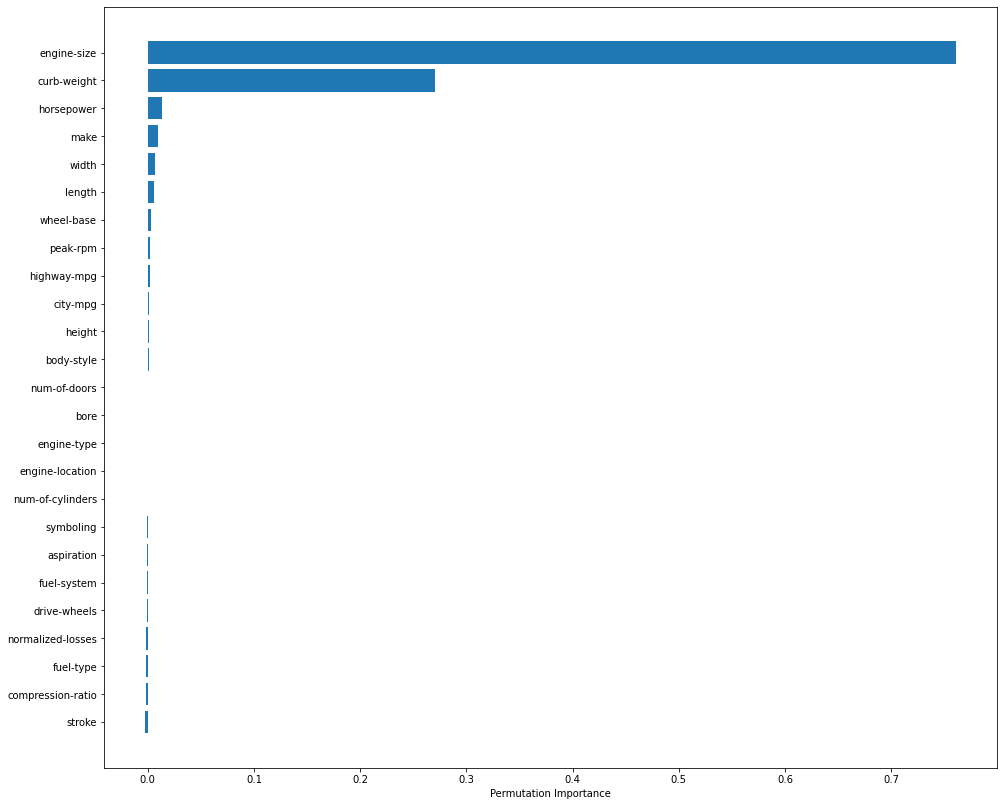

In [76]:
sorted_idx1 = perm_importance.importances_mean.argsort()
plt.figure(figsize=(16, 14))
plt.barh(data.columns[sorted_idx1], perm_importance.importances_mean[sorted_idx1])
plt.xlabel("Permutation Importance")

## Feature Importance Computed with SHAP Values

- #### The core idea behind Shapley value based explanations of machine learning models is to use fair allocation results from cooperative game theory to allocate credit for a model’s output  among its input features . 
- #### The SHAP importance of a given feature is computed by taking the average of the absolute Shapley values computed on a given dataset. It represents the average strength with which that feature influences predictions on a given dataset, e.g. the test set.
### The main advantages of SHAP feature importance are the following:
- #### Its core, the Shapley values, has a strong mathematical foundation, boosting confidence in the results.
- #### SHAP also takes into consideration relationships between features while calculating the Shapley values.
- #### The computation of Shapley values for tree-based models is very efficient.

In [77]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X6_test)

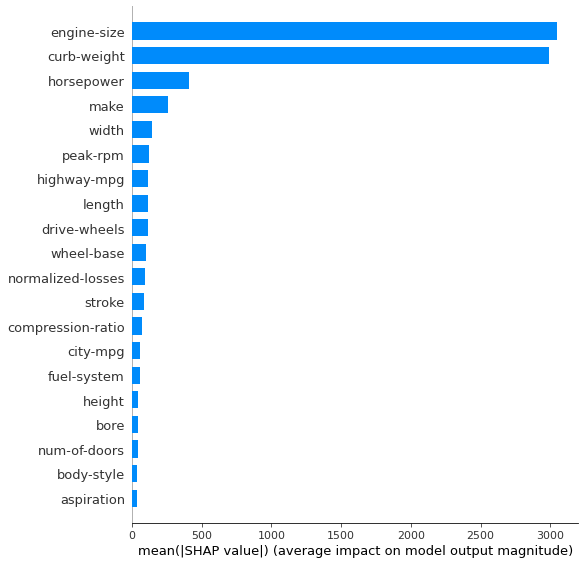

In [78]:
shap.summary_plot(shap_values, X6_test, plot_type="bar")

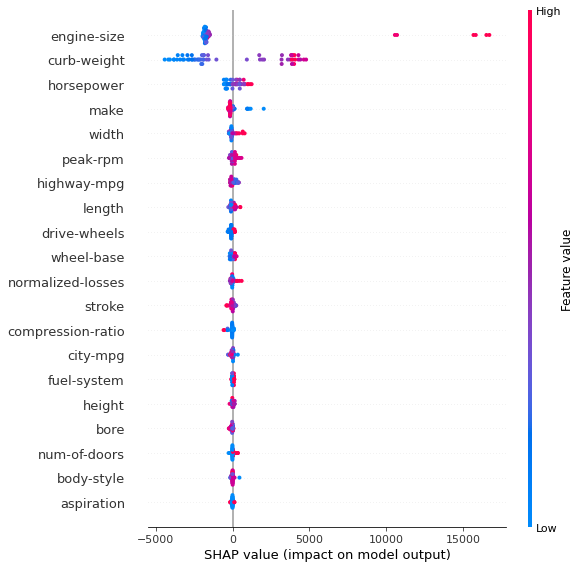

In [79]:
shap.summary_plot(shap_values, X6_test)

Type 2

In [80]:
from sklearn.feature_selection import SelectFromModel

In [81]:
X7=data.drop("price",axis=1)
y7=data["price"]
X7_train, X7_test, y7_train, y7_test = train_test_split(
    X7,
    y7,
    test_size=0.3,
    random_state=0)

In [82]:
sel = SelectFromModel(RandomForestRegressor(n_estimators=100))
sel.fit(X7_train, y7_train)

SelectFromModel(estimator=RandomForestRegressor())

In [83]:
sel.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False])

In [84]:
selected_feat= X7_train.columns[(sel.get_support())]
len(selected_feat)

2

In [85]:
print(selected_feat)

Index(['curb-weight', 'engine-size'], dtype='object')


## Lasso Regression 

- #### The word “LASSO” stands for Least Absolute Shrinkage and Selection Operator. It is a statistical formula for the regularization of data models and feature selection.
- #### Trying to minimize the cost function, Lasso regression will automatically select those features that are useful, discarding the useless or redundant features. 
- #### In Lasso regression, discarding a feature will make its coefficient equal to 0.
- #### So, the idea of using Lasso regression for feature selection purposes is very simple: we fit a Lasso regression on a scaled version of our dataset, and we consider only those features that have a coefficient different from 0.
- #### Obviously, we first need to tune α hyperparameter in order to have the right kind of Lasso regression.
- #### We can use the GridSearchCV to find the best hyperparameter and Lasso method for Feature Selection


In [86]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [87]:
X8=data.drop("price",axis=1)
y8=data["price"]
X8_train, X8_test, y8_train, y8_test = train_test_split(
    X8,
    y8,
    test_size=0.3,
    random_state=0)

In [88]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [89]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,100,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [90]:
search.fit(X8_train,y8_train)

Fitting 5 folds for each of 999 candidates, totalling 4995 fits
[CV] model__alpha=0.1 ................................................
[CV] ............ model__alpha=0.1, score=-11705976.509, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............ model__alpha=0.1, score=-16341655.221, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............ model__alpha=0.1, score=-19068097.164, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............ model__alpha=0.1, score=-11267734.875, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............. model__alpha=0.1, score=-4221476.968, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ............ model__alpha=0.2, score=-11695250.860, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Objective did not converge. You might want to increase the number of iterations. Duality gap: 4090393.7206987143, tolerance: 639212.6594916667
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
Objective did not converge. You might want to increase the number of iterations. Duality gap: 9932257.52560097, tolerance: 642963.213351852
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
Objective did not converge. You might want to increase the number of iterations. Duality gap: 1870160.9415723085, tolerance: 763752.7118666667
Objective did not converge. You might want to increase the number of iterations. Duality gap: 1164233.27477324, tolerance: 639212.6594916667
Objective did not converge. You might want to increase the number of iterations. Duality gap: 2991533.1251318455, tolerance: 642963.213351852
Objective did not converge. You might want to incr

[CV] ............ model__alpha=0.4, score=-18982252.155, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] ............ model__alpha=0.4, score=-11241324.766, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] ............. model__alpha=0.4, score=-4202271.541, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ............ model__alpha=0.5, score=-11662707.994, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ............ model__alpha=0.5, score=-16363861.558, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ............ model__alpha=0.5, score=-18953621.171, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ............ model__alpha=0.5, score=-11232542.807, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] .

[CV] ............ model__alpha=1.6, score=-16430955.183, total=   0.0s
[CV] model__alpha=1.6 ................................................
[CV] ............ model__alpha=1.6, score=-18640495.042, total=   0.0s
[CV] model__alpha=1.6 ................................................
[CV] ............ model__alpha=1.6, score=-11136656.668, total=   0.0s
[CV] model__alpha=1.6 ................................................
[CV] ............. model__alpha=1.6, score=-4127789.187, total=   0.0s
[CV] model__alpha=1.7000000000000002 .................................
[CV]  model__alpha=1.7000000000000002, score=-11534678.844, total=   0.0s
[CV] model__alpha=1.7000000000000002 .................................
[CV]  model__alpha=1.7000000000000002, score=-16437431.781, total=   0.0s
[CV] model__alpha=1.7000000000000002 .................................
[CV]  model__alpha=1.7000000000000002, score=-18612123.315, total=   0.0s
[CV] model__alpha=1.7000000000000002 ...............................

[CV] ............. model__alpha=2.7, score=-4062551.938, total=   0.0s
[CV] model__alpha=2.8000000000000003 .................................
[CV]  model__alpha=2.8000000000000003, score=-11421297.057, total=   0.0s
[CV] model__alpha=2.8000000000000003 .................................
[CV]  model__alpha=2.8000000000000003, score=-16512600.763, total=   0.0s
[CV] model__alpha=2.8000000000000003 .................................
[CV]  model__alpha=2.8000000000000003, score=-18395846.305, total=   0.0s
[CV] model__alpha=2.8000000000000003 .................................
[CV]  model__alpha=2.8000000000000003, score=-11033638.521, total=   0.0s
[CV] model__alpha=2.8000000000000003 .................................
[CV]  model__alpha=2.8000000000000003, score=-4056585.720, total=   0.0s
[CV] model__alpha=2.9000000000000004 .................................
[CV]  model__alpha=2.9000000000000004, score=-11411162.405, total=   0.0s
[CV] model__alpha=2.9000000000000004 .......................

[CV]  model__alpha=3.9000000000000004, score=-16588548.626, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV]  model__alpha=3.9000000000000004, score=-18260469.216, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV]  model__alpha=3.9000000000000004, score=-10940715.625, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV]  model__alpha=3.9000000000000004, score=-3992541.919, total=   0.0s
[CV] model__alpha=4.0 ................................................
[CV] ............ model__alpha=4.0, score=-11299161.420, total=   0.0s
[CV] model__alpha=4.0 ................................................
[CV] ............ model__alpha=4.0, score=-16589315.201, total=   0.0s
[CV] model__alpha=4.0 ................................................
[CV] ............ model__alpha=4.0, score=-18248224.179, total=   0.0s
[CV] model__alpha=4.0 ............................................

[CV] ............ model__alpha=5.1, score=-18117139.638, total=   0.0s
[CV] model__alpha=5.1 ................................................
[CV] ............ model__alpha=5.1, score=-10841022.339, total=   0.0s
[CV] model__alpha=5.1 ................................................
[CV] ............. model__alpha=5.1, score=-3926009.585, total=   0.0s
[CV] model__alpha=5.2 ................................................
[CV] ............ model__alpha=5.2, score=-11167351.185, total=   0.0s
[CV] model__alpha=5.2 ................................................
[CV] ............ model__alpha=5.2, score=-16601280.740, total=   0.0s
[CV] model__alpha=5.2 ................................................
[CV] ............ model__alpha=5.2, score=-18104385.620, total=   0.0s
[CV] model__alpha=5.2 ................................................
[CV] ............ model__alpha=5.2, score=-10832783.569, total=   0.0s
[CV] model__alpha=5.2 ................................................
[CV] .

[CV] ............ model__alpha=6.4, score=-17953250.382, total=   0.0s
[CV] model__alpha=6.4 ................................................
[CV] ............ model__alpha=6.4, score=-10731526.423, total=   0.0s
[CV] model__alpha=6.4 ................................................
[CV] ............. model__alpha=6.4, score=-3857784.599, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ............ model__alpha=6.5, score=-11071363.916, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ............ model__alpha=6.5, score=-16575411.075, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ............ model__alpha=6.5, score=-17940990.051, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ............ model__alpha=6.5, score=-10721122.820, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] .

[CV] ............ model__alpha=7.7, score=-16552205.920, total=   0.0s
[CV] model__alpha=7.7 ................................................
[CV] ............ model__alpha=7.7, score=-17796283.988, total=   0.0s
[CV] model__alpha=7.7 ................................................
[CV] ............ model__alpha=7.7, score=-10605734.010, total=   0.0s
[CV] model__alpha=7.7 ................................................
[CV] ............. model__alpha=7.7, score=-3793566.137, total=   0.0s
[CV] model__alpha=7.8 ................................................
[CV] ............ model__alpha=7.8, score=-10985946.656, total=   0.0s
[CV] model__alpha=7.8 ................................................
[CV] ............ model__alpha=7.8, score=-16550330.498, total=   0.0s
[CV] model__alpha=7.8 ................................................
[CV] ............ model__alpha=7.8, score=-17783392.488, total=   0.0s
[CV] model__alpha=7.8 ................................................
[CV] .

[CV] ............. model__alpha=9.0, score=-3733309.833, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............ model__alpha=9.1, score=-10903753.377, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............ model__alpha=9.1, score=-16526108.314, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............ model__alpha=9.1, score=-17623972.600, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............ model__alpha=9.1, score=-10446688.404, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............. model__alpha=9.1, score=-3728842.164, total=   0.0s
[CV] model__alpha=9.2 ................................................
[CV] ............ model__alpha=9.2, score=-10897522.347, total=   0.0s
[CV] model__alpha=9.2 ................................................
[CV] .

[CV] ........... model__alpha=10.4, score=-17465541.651, total=   0.0s
[CV] model__alpha=10.4 ...............................................
[CV] ........... model__alpha=10.4, score=-10302418.489, total=   0.0s
[CV] model__alpha=10.4 ...............................................
[CV] ............ model__alpha=10.4, score=-3672871.240, total=   0.0s
[CV] model__alpha=10.5 ...............................................
[CV] ........... model__alpha=10.5, score=-10818667.010, total=   0.0s
[CV] model__alpha=10.5 ...............................................
[CV] ........... model__alpha=10.5, score=-16501223.024, total=   0.0s
[CV] model__alpha=10.5 ...............................................
[CV] ........... model__alpha=10.5, score=-17453384.216, total=   0.0s
[CV] model__alpha=10.5 ...............................................
[CV] ........... model__alpha=10.5, score=-10291548.622, total=   0.0s
[CV] model__alpha=10.5 ...............................................
[CV] .

[CV] ........... model__alpha=11.8, score=-10747787.433, total=   0.0s
[CV] model__alpha=11.8 ...............................................
[CV] ........... model__alpha=11.8, score=-16478892.063, total=   0.0s
[CV] model__alpha=11.8 ...............................................
[CV] ........... model__alpha=11.8, score=-17296146.702, total=   0.0s
[CV] model__alpha=11.8 ...............................................
[CV] ........... model__alpha=11.8, score=-10144126.295, total=   0.0s
[CV] model__alpha=11.8 ...............................................
[CV] ............ model__alpha=11.8, score=-3617009.493, total=   0.0s
[CV] model__alpha=11.9 ...............................................
[CV] ........... model__alpha=11.9, score=-10742844.619, total=   0.0s
[CV] model__alpha=11.9 ...............................................
[CV] ........... model__alpha=11.9, score=-16477247.350, total=   0.0s
[CV] model__alpha=11.9 ...............................................
[CV] .

[CV]  model__alpha=13.200000000000001, score=-10674686.242, total=   0.0s
[CV] model__alpha=13.200000000000001 .................................
[CV]  model__alpha=13.200000000000001, score=-16455272.668, total=   0.0s
[CV] model__alpha=13.200000000000001 .................................
[CV]  model__alpha=13.200000000000001, score=-17128143.809, total=   0.0s
[CV] model__alpha=13.200000000000001 .................................
[CV]  model__alpha=13.200000000000001, score=-9987724.912, total=   0.0s
[CV] model__alpha=13.200000000000001 .................................
[CV]  model__alpha=13.200000000000001, score=-3565730.933, total=   0.0s
[CV] model__alpha=13.3 ...............................................
[CV] ........... model__alpha=13.3, score=-10669512.125, total=   0.0s
[CV] model__alpha=13.3 ...............................................
[CV] ........... model__alpha=13.3, score=-16453708.363, total=   0.0s
[CV] model__alpha=13.3 .........................................

[CV] ........... model__alpha=14.6, score=-16434048.046, total=   0.0s
[CV] model__alpha=14.6 ...............................................
[CV] ........... model__alpha=14.6, score=-16961658.625, total=   0.0s
[CV] model__alpha=14.6 ...............................................
[CV] ............ model__alpha=14.6, score=-9834477.482, total=   0.0s
[CV] model__alpha=14.6 ...............................................
[CV] ............ model__alpha=14.6, score=-3517205.120, total=   0.0s
[CV] model__alpha=14.700000000000001 .................................
[CV]  model__alpha=14.700000000000001, score=-10598658.866, total=   0.0s
[CV] model__alpha=14.700000000000001 .................................
[CV]  model__alpha=14.700000000000001, score=-16432569.596, total=   0.0s
[CV] model__alpha=14.700000000000001 .................................
[CV]  model__alpha=14.700000000000001, score=-16949928.463, total=   0.0s
[CV] model__alpha=14.700000000000001 ...............................

[CV] ........... model__alpha=16.0, score=-10540189.840, total=   0.0s
[CV] model__alpha=16.0 ...............................................
[CV] ........... model__alpha=16.0, score=-16413184.218, total=   0.0s
[CV] model__alpha=16.0 ...............................................
[CV] ........... model__alpha=16.0, score=-16797556.602, total=   0.0s
[CV] model__alpha=16.0 ...............................................
[CV] ............ model__alpha=16.0, score=-9684972.424, total=   0.0s
[CV] model__alpha=16.0 ...............................................
[CV] ............ model__alpha=16.0, score=-3473543.711, total=   0.0s
[CV] model__alpha=16.1 ...............................................
[CV] ........... model__alpha=16.1, score=-10535836.347, total=   0.0s
[CV] model__alpha=16.1 ...............................................
[CV] ........... model__alpha=16.1, score=-16411768.025, total=   0.0s
[CV] model__alpha=16.1 ...............................................
[CV] .

[CV] ............ model__alpha=17.3, score=-9549460.626, total=   0.0s
[CV] model__alpha=17.3 ...............................................
[CV] ............ model__alpha=17.3, score=-3433887.904, total=   0.0s
[CV] model__alpha=17.400000000000002 .................................
[CV]  model__alpha=17.400000000000002, score=-10479784.412, total=   0.0s
[CV] model__alpha=17.400000000000002 .................................
[CV]  model__alpha=17.400000000000002, score=-16393311.201, total=   0.0s
[CV] model__alpha=17.400000000000002 .................................
[CV]  model__alpha=17.400000000000002, score=-16635930.190, total=   0.0s
[CV] model__alpha=17.400000000000002 .................................
[CV]  model__alpha=17.400000000000002, score=-9539161.140, total=   0.0s
[CV] model__alpha=17.400000000000002 .................................
[CV]  model__alpha=17.400000000000002, score=-3430885.297, total=   0.0s
[CV] model__alpha=17.500000000000004 ...........................

[CV]  model__alpha=18.700000000000003, score=-9406981.240, total=   0.0s
[CV] model__alpha=18.700000000000003 .................................
[CV]  model__alpha=18.700000000000003, score=-3392024.445, total=   0.0s
[CV] model__alpha=18.8 ...............................................
[CV] ........... model__alpha=18.8, score=-10422016.966, total=   0.0s
[CV] model__alpha=18.8 ...............................................
[CV] ........... model__alpha=18.8, score=-16381758.740, total=   0.0s
[CV] model__alpha=18.8 ...............................................
[CV] ........... model__alpha=18.8, score=-16478032.595, total=   0.0s
[CV] model__alpha=18.8 ...............................................
[CV] ............ model__alpha=18.8, score=-9396976.704, total=   0.0s
[CV] model__alpha=18.8 ...............................................
[CV] ............ model__alpha=18.8, score=-3389095.494, total=   0.0s
[CV] model__alpha=18.900000000000002 .................................
[C

[CV]  model__alpha=20.200000000000003, score=-10366770.593, total=   0.0s
[CV] model__alpha=20.200000000000003 .................................
[CV]  model__alpha=20.200000000000003, score=-16365392.908, total=   0.0s
[CV] model__alpha=20.200000000000003 .................................
[CV]  model__alpha=20.200000000000003, score=-16323398.649, total=   0.0s
[CV] model__alpha=20.200000000000003 .................................
[CV]  model__alpha=20.200000000000003, score=-9258245.937, total=   0.0s
[CV] model__alpha=20.200000000000003 .................................
[CV]  model__alpha=20.200000000000003, score=-3354903.840, total=   0.0s
[CV] model__alpha=20.300000000000004 .................................
[CV]  model__alpha=20.300000000000004, score=-10362918.428, total=   0.0s
[CV] model__alpha=20.300000000000004 .................................
[CV]  model__alpha=20.300000000000004, score=-16364498.500, total=   0.0s
[CV] model__alpha=20.300000000000004 .....................

[CV] ........... model__alpha=21.6, score=-10314089.978, total=   0.0s
[CV] model__alpha=21.6 ...............................................
[CV] ........... model__alpha=21.6, score=-16347810.064, total=   0.0s
[CV] model__alpha=21.6 ...............................................
[CV] ........... model__alpha=21.6, score=-16172014.675, total=   0.0s
[CV] model__alpha=21.6 ...............................................
[CV] ............ model__alpha=21.6, score=-9122917.737, total=   0.0s
[CV] model__alpha=21.6 ...............................................
[CV] ............ model__alpha=21.6, score=-3326217.981, total=   0.0s
[CV] model__alpha=21.700000000000003 .................................
[CV]  model__alpha=21.700000000000003, score=-10310503.007, total=   0.0s
[CV] model__alpha=21.700000000000003 .................................
[CV]  model__alpha=21.700000000000003, score=-16345903.879, total=   0.0s
[CV] model__alpha=21.700000000000003 .................................


[CV]  model__alpha=23.000000000000004, score=-16023933.335, total=   0.0s
[CV] model__alpha=23.000000000000004 .................................
[CV]  model__alpha=23.000000000000004, score=-8992531.205, total=   0.0s
[CV] model__alpha=23.000000000000004 .................................
[CV]  model__alpha=23.000000000000004, score=-3298574.167, total=   0.0s
[CV] model__alpha=23.1 ...............................................
[CV] ........... model__alpha=23.1, score=-10260407.569, total=   0.0s
[CV] model__alpha=23.1 ...............................................
[CV] ........... model__alpha=23.1, score=-16318088.607, total=   0.0s
[CV] model__alpha=23.1 ...............................................
[CV] ........... model__alpha=23.1, score=-16013460.939, total=   0.0s
[CV] model__alpha=23.1 ...............................................
[CV] ............ model__alpha=23.1, score=-8983353.702, total=   0.0s
[CV] model__alpha=23.1 ...............................................

[CV]  model__alpha=24.500000000000004, score=-10240295.091, total=   0.0s
[CV] model__alpha=24.500000000000004 .................................
[CV]  model__alpha=24.500000000000004, score=-16290436.274, total=   0.0s
[CV] model__alpha=24.500000000000004 .................................
[CV]  model__alpha=24.500000000000004, score=-15868601.978, total=   0.0s
[CV] model__alpha=24.500000000000004 .................................
[CV]  model__alpha=24.500000000000004, score=-8856238.222, total=   0.0s
[CV] model__alpha=24.500000000000004 .................................
[CV]  model__alpha=24.500000000000004, score=-3269922.752, total=   0.0s
[CV] model__alpha=24.6 ...............................................
[CV] ........... model__alpha=24.6, score=-10241728.406, total=   0.0s
[CV] model__alpha=24.6 ...............................................
[CV] ........... model__alpha=24.6, score=-16288637.414, total=   0.0s
[CV] model__alpha=24.6 .........................................

[CV]  model__alpha=25.900000000000002, score=-8732335.947, total=   0.0s
[CV] model__alpha=25.900000000000002 .................................
[CV]  model__alpha=25.900000000000002, score=-3244060.228, total=   0.0s
[CV] model__alpha=26.000000000000004 .................................
[CV]  model__alpha=26.000000000000004, score=-10262623.682, total=   0.0s
[CV] model__alpha=26.000000000000004 .................................
[CV]  model__alpha=26.000000000000004, score=-16259840.333, total=   0.0s
[CV] model__alpha=26.000000000000004 .................................
[CV]  model__alpha=26.000000000000004, score=-15716705.076, total=   0.0s
[CV] model__alpha=26.000000000000004 .................................
[CV]  model__alpha=26.000000000000004, score=-8723627.771, total=   0.0s
[CV] model__alpha=26.000000000000004 .................................
[CV]  model__alpha=26.000000000000004, score=-3242242.140, total=   0.0s
[CV] model__alpha=26.1 .....................................

[CV]  model__alpha=27.300000000000004, score=-3218939.840, total=   0.0s
[CV] model__alpha=27.400000000000002 .................................
[CV]  model__alpha=27.400000000000002, score=-10284224.787, total=   0.0s
[CV] model__alpha=27.400000000000002 .................................
[CV]  model__alpha=27.400000000000002, score=-16230362.937, total=   0.0s
[CV] model__alpha=27.400000000000002 .................................
[CV]  model__alpha=27.400000000000002, score=-15577919.973, total=   0.0s
[CV] model__alpha=27.400000000000002 .................................
[CV]  model__alpha=27.400000000000002, score=-8602878.617, total=   0.0s
[CV] model__alpha=27.400000000000002 .................................
[CV]  model__alpha=27.400000000000002, score=-3217175.743, total=   0.0s
[CV] model__alpha=27.500000000000004 .................................
[CV]  model__alpha=27.500000000000004, score=-10285762.787, total=   0.0s
[CV] model__alpha=27.500000000000004 ......................

[CV]  model__alpha=28.800000000000004, score=-16204442.488, total=   0.0s
[CV] model__alpha=28.800000000000004 .................................
[CV]  model__alpha=28.800000000000004, score=-15441866.862, total=   0.0s
[CV] model__alpha=28.800000000000004 .................................
[CV]  model__alpha=28.800000000000004, score=-8485149.698, total=   0.0s
[CV] model__alpha=28.800000000000004 .................................
[CV]  model__alpha=28.800000000000004, score=-3192836.899, total=   0.0s
[CV] model__alpha=28.900000000000002 .................................
[CV]  model__alpha=28.900000000000002, score=-10298949.060, total=   0.0s
[CV] model__alpha=28.900000000000002 .................................
[CV]  model__alpha=28.900000000000002, score=-16203599.378, total=   0.0s
[CV] model__alpha=28.900000000000002 .................................
[CV]  model__alpha=28.900000000000002, score=-15432232.996, total=   0.0s
[CV] model__alpha=28.900000000000002 .....................

[CV]  model__alpha=30.200000000000003, score=-8370849.173, total=   0.0s
[CV] model__alpha=30.200000000000003 .................................
[CV]  model__alpha=30.200000000000003, score=-3168957.990, total=   0.0s
[CV] model__alpha=30.300000000000004 .................................
[CV]  model__alpha=30.300000000000004, score=-10310096.835, total=   0.0s
[CV] model__alpha=30.300000000000004 .................................
[CV]  model__alpha=30.300000000000004, score=-16193118.613, total=   0.0s
[CV] model__alpha=30.300000000000004 .................................
[CV]  model__alpha=30.300000000000004, score=-15292027.549, total=   0.0s
[CV] model__alpha=30.300000000000004 .................................
[CV]  model__alpha=30.300000000000004, score=-8362656.653, total=   0.0s
[CV] model__alpha=30.300000000000004 .................................
[CV]  model__alpha=30.300000000000004, score=-3167272.494, total=   0.0s
[CV] model__alpha=30.400000000000002 .......................

[CV]  model__alpha=31.700000000000003, score=-10321387.859, total=   0.0s
[CV] model__alpha=31.700000000000003 .................................
[CV]  model__alpha=31.700000000000003, score=-16181753.377, total=   0.0s
[CV] model__alpha=31.700000000000003 .................................
[CV]  model__alpha=31.700000000000003, score=-15157296.889, total=   0.0s
[CV] model__alpha=31.700000000000003 .................................
[CV]  model__alpha=31.700000000000003, score=-8251930.081, total=   0.0s
[CV] model__alpha=31.700000000000003 .................................
[CV]  model__alpha=31.700000000000003, score=-3143107.788, total=   0.0s
[CV] model__alpha=31.800000000000004 .................................
[CV]  model__alpha=31.800000000000004, score=-10322299.683, total=   0.0s
[CV] model__alpha=31.800000000000004 .................................
[CV]  model__alpha=31.800000000000004, score=-16180932.626, total=   0.0s
[CV] model__alpha=31.800000000000004 .....................

[CV] ........... model__alpha=33.1, score=-16170483.874, total=   0.0s
[CV] model__alpha=33.1 ...............................................
[CV] ........... model__alpha=33.1, score=-15029252.565, total=   0.0s
[CV] model__alpha=33.1 ...............................................
[CV] ............ model__alpha=33.1, score=-8144339.448, total=   0.0s
[CV] model__alpha=33.1 ...............................................
[CV] ............ model__alpha=33.1, score=-3116025.158, total=   0.0s
[CV] model__alpha=33.2 ...............................................
[CV] ........... model__alpha=33.2, score=-10333957.462, total=   0.0s
[CV] model__alpha=33.2 ...............................................
[CV] ........... model__alpha=33.2, score=-16169907.266, total=   0.0s
[CV] model__alpha=33.2 ...............................................
[CV] ........... model__alpha=33.2, score=-15020289.093, total=   0.0s
[CV] model__alpha=33.2 ...............................................
[CV] .

[CV] ........... model__alpha=34.5, score=-10345267.733, total=   0.0s
[CV] model__alpha=34.5 ...............................................
[CV] ........... model__alpha=34.5, score=-16160111.522, total=   0.0s
[CV] model__alpha=34.5 ...............................................
[CV] ........... model__alpha=34.5, score=-14933205.914, total=   0.0s
[CV] model__alpha=34.5 ...............................................
[CV] ............ model__alpha=34.5, score=-8040065.633, total=   0.0s
[CV] model__alpha=34.5 ...............................................
[CV] ............ model__alpha=34.5, score=-3088071.623, total=   0.0s
[CV] model__alpha=34.6 ...............................................
[CV] ........... model__alpha=34.6, score=-10345978.940, total=   0.0s
[CV] model__alpha=34.6 ...............................................
[CV] ........... model__alpha=34.6, score=-16159342.820, total=   0.0s
[CV] model__alpha=34.6 ...............................................
[CV] .

[CV]  model__alpha=35.900000000000006, score=-3060822.966, total=   0.0s
[CV] model__alpha=36.0 ...............................................
[CV] ........... model__alpha=36.0, score=-10358441.420, total=   0.0s
[CV] model__alpha=36.0 ...............................................
[CV] ........... model__alpha=36.0, score=-16148940.153, total=   0.0s
[CV] model__alpha=36.0 ...............................................
[CV] ........... model__alpha=36.0, score=-14838939.049, total=   0.0s
[CV] model__alpha=36.0 ...............................................
[CV] ............ model__alpha=36.0, score=-7931995.785, total=   0.0s
[CV] model__alpha=36.0 ...............................................
[CV] ............ model__alpha=36.0, score=-3059061.182, total=   0.0s
[CV] model__alpha=36.1 ...............................................
[CV] ........... model__alpha=36.1, score=-10359170.437, total=   0.0s
[CV] model__alpha=36.1 ...............................................
[CV]

[CV]  model__alpha=37.400000000000006, score=-16138809.404, total=   0.0s
[CV] model__alpha=37.400000000000006 .................................
[CV]  model__alpha=37.400000000000006, score=-14751351.977, total=   0.0s
[CV] model__alpha=37.400000000000006 .................................
[CV]  model__alpha=37.400000000000006, score=-7834729.799, total=   0.0s
[CV] model__alpha=37.400000000000006 .................................
[CV]  model__alpha=37.400000000000006, score=-3038106.140, total=   0.0s
[CV] model__alpha=37.5 ...............................................
[CV] ........... model__alpha=37.5, score=-10371909.456, total=   0.0s
[CV] model__alpha=37.5 ...............................................
[CV] ........... model__alpha=37.5, score=-16138101.996, total=   0.0s
[CV] model__alpha=37.5 ...............................................
[CV] ........... model__alpha=37.5, score=-14745074.784, total=   0.0s
[CV] model__alpha=37.5 ............................................

[CV]  model__alpha=38.800000000000004, score=-7740638.481, total=   0.0s
[CV] model__alpha=38.800000000000004 .................................
[CV]  model__alpha=38.800000000000004, score=-3017169.442, total=   0.0s
[CV] model__alpha=38.900000000000006 .................................
[CV]  model__alpha=38.900000000000006, score=-10384759.201, total=   0.0s
[CV] model__alpha=38.900000000000006 .................................
[CV]  model__alpha=38.900000000000006, score=-16128540.258, total=   0.0s
[CV] model__alpha=38.900000000000006 .................................
[CV]  model__alpha=38.900000000000006, score=-14658153.618, total=   0.0s
[CV] model__alpha=38.900000000000006 .................................
[CV]  model__alpha=38.900000000000006, score=-7734074.529, total=   0.0s
[CV] model__alpha=38.900000000000006 .................................
[CV]  model__alpha=38.900000000000006, score=-3015640.822, total=   0.0s
[CV] model__alpha=39.00000000000001 ........................

[CV]  model__alpha=40.300000000000004, score=-16119322.736, total=   0.0s
[CV] model__alpha=40.300000000000004 .................................
[CV]  model__alpha=40.300000000000004, score=-14573041.502, total=   0.0s
[CV] model__alpha=40.300000000000004 .................................
[CV]  model__alpha=40.300000000000004, score=-7643694.449, total=   0.0s
[CV] model__alpha=40.300000000000004 .................................
[CV]  model__alpha=40.300000000000004, score=-2995059.761, total=   0.0s
[CV] model__alpha=40.400000000000006 .................................
[CV]  model__alpha=40.400000000000006, score=-10401693.732, total=   0.0s
[CV] model__alpha=40.400000000000006 .................................
[CV]  model__alpha=40.400000000000006, score=-16118672.527, total=   0.0s
[CV] model__alpha=40.400000000000006 .................................
[CV]  model__alpha=40.400000000000006, score=-14567142.315, total=   0.0s
[CV] model__alpha=40.400000000000006 .....................

[CV] ............ model__alpha=41.7, score=-2974812.727, total=   0.0s
[CV] model__alpha=41.800000000000004 .................................
[CV]  model__alpha=41.800000000000004, score=-10418737.575, total=   0.0s
[CV] model__alpha=41.800000000000004 .................................
[CV]  model__alpha=41.800000000000004, score=-16109861.677, total=   0.0s
[CV] model__alpha=41.800000000000004 .................................
[CV]  model__alpha=41.800000000000004, score=-14483267.559, total=   0.0s
[CV] model__alpha=41.800000000000004 .................................
[CV]  model__alpha=41.800000000000004, score=-7550645.790, total=   0.0s
[CV] model__alpha=41.800000000000004 .................................
[CV]  model__alpha=41.800000000000004, score=-2973353.900, total=   0.0s
[CV] model__alpha=41.900000000000006 .................................
[CV]  model__alpha=41.900000000000006, score=-10419859.150, total=   0.0s
[CV] model__alpha=41.900000000000006 ........................

[CV] ........... model__alpha=43.2, score=-14401522.156, total=   0.0s
[CV] model__alpha=43.2 ...............................................
[CV] ............ model__alpha=43.2, score=-7486874.273, total=   0.0s
[CV] model__alpha=43.2 ...............................................
[CV] ............ model__alpha=43.2, score=-2953498.825, total=   0.0s
[CV] model__alpha=43.300000000000004 .................................
[CV]  model__alpha=43.300000000000004, score=-10437101.963, total=   0.0s
[CV] model__alpha=43.300000000000004 .................................
[CV]  model__alpha=43.300000000000004, score=-16100889.999, total=   0.0s
[CV] model__alpha=43.300000000000004 .................................
[CV]  model__alpha=43.300000000000004, score=-14395964.412, total=   0.0s
[CV] model__alpha=43.300000000000004 .................................
[CV]  model__alpha=43.300000000000004, score=-7482630.263, total=   0.0s
[CV] model__alpha=43.300000000000004 .............................

[CV] ........... model__alpha=44.7, score=-10454565.216, total=   0.0s
[CV] model__alpha=44.7 ...............................................
[CV] ........... model__alpha=44.7, score=-16092842.622, total=   0.0s
[CV] model__alpha=44.7 ...............................................
[CV] ........... model__alpha=44.7, score=-14314242.405, total=   0.0s
[CV] model__alpha=44.7 ...............................................
[CV] ............ model__alpha=44.7, score=-7421148.846, total=   0.0s
[CV] model__alpha=44.7 ...............................................
[CV] ............ model__alpha=44.7, score=-2932691.430, total=   0.0s
[CV] model__alpha=44.800000000000004 .................................
[CV]  model__alpha=44.800000000000004, score=-10455839.267, total=   0.0s
[CV] model__alpha=44.800000000000004 .................................
[CV]  model__alpha=44.800000000000004, score=-16092279.684, total=   0.0s
[CV] model__alpha=44.800000000000004 .................................


[CV] ........... model__alpha=46.1, score=-14234607.816, total=   0.0s
[CV] model__alpha=46.1 ...............................................
[CV] ............ model__alpha=46.1, score=-7358578.146, total=   0.0s
[CV] model__alpha=46.1 ...............................................
[CV] ............ model__alpha=46.1, score=-2913616.308, total=   0.0s
[CV] model__alpha=46.2 ...............................................
[CV] ........... model__alpha=46.2, score=-10473521.783, total=   0.0s
[CV] model__alpha=46.2 ...............................................
[CV] ........... model__alpha=46.2, score=-16084608.995, total=   0.0s
[CV] model__alpha=46.2 ...............................................
[CV] ........... model__alpha=46.2, score=-14229515.238, total=   0.0s
[CV] model__alpha=46.2 ...............................................
[CV] ............ model__alpha=46.2, score=-7354342.987, total=   0.0s
[CV] model__alpha=46.2 ...............................................
[CV] .

[CV] ........... model__alpha=47.6, score=-10491423.968, total=   0.0s
[CV] model__alpha=47.6 ...............................................
[CV] ........... model__alpha=47.6, score=-16077330.932, total=   0.0s
[CV] model__alpha=47.6 ...............................................
[CV] ........... model__alpha=47.6, score=-14152644.587, total=   0.0s
[CV] model__alpha=47.6 ...............................................
[CV] ............ model__alpha=47.6, score=-7295017.508, total=   0.0s
[CV] model__alpha=47.6 ...............................................
[CV] ............ model__alpha=47.6, score=-2893595.952, total=   0.0s
[CV] model__alpha=47.7 ...............................................
[CV] ........... model__alpha=47.7, score=-10492725.021, total=   0.0s
[CV] model__alpha=47.7 ...............................................
[CV] ........... model__alpha=47.7, score=-16076826.142, total=   0.0s
[CV] model__alpha=47.7 ...............................................
[CV] .

[CV]  model__alpha=49.00000000000001, score=-16070466.831, total=   0.0s
[CV] model__alpha=49.00000000000001 ..................................
[CV]  model__alpha=49.00000000000001, score=-14076128.730, total=   0.0s
[CV] model__alpha=49.00000000000001 ..................................
[CV]  model__alpha=49.00000000000001, score=-7239835.939, total=   0.0s
[CV] model__alpha=49.00000000000001 ..................................
[CV]  model__alpha=49.00000000000001, score=-2875237.944, total=   0.0s
[CV] model__alpha=49.1 ...............................................
[CV] ........... model__alpha=49.1, score=-10510846.783, total=   0.0s
[CV] model__alpha=49.1 ...............................................
[CV] ........... model__alpha=49.1, score=-16069989.713, total=   0.0s
[CV] model__alpha=49.1 ...............................................
[CV] ........... model__alpha=49.1, score=-14071147.324, total=   0.0s
[CV] model__alpha=49.1 ...............................................


[CV]  model__alpha=50.400000000000006, score=-7186553.286, total=   0.0s
[CV] model__alpha=50.400000000000006 .................................
[CV]  model__alpha=50.400000000000006, score=-2862402.304, total=   0.0s
[CV] model__alpha=50.50000000000001 ..................................
[CV]  model__alpha=50.50000000000001, score=-10529412.142, total=   0.0s
[CV] model__alpha=50.50000000000001 ..................................
[CV]  model__alpha=50.50000000000001, score=-16063534.079, total=   0.0s
[CV] model__alpha=50.50000000000001 ..................................
[CV]  model__alpha=50.50000000000001, score=-13995917.637, total=   0.0s
[CV] model__alpha=50.50000000000001 ..................................
[CV]  model__alpha=50.50000000000001, score=-7182823.073, total=   0.0s
[CV] model__alpha=50.50000000000001 ..................................
[CV]  model__alpha=50.50000000000001, score=-2861458.542, total=   0.0s
[CV] model__alpha=50.6 ..........................................

[CV]  model__alpha=51.800000000000004, score=-2849610.737, total=   0.0s
[CV] model__alpha=51.900000000000006 .................................
[CV]  model__alpha=51.900000000000006, score=-10544201.414, total=   0.0s
[CV] model__alpha=51.900000000000006 .................................
[CV]  model__alpha=51.900000000000006, score=-16057466.936, total=   0.0s
[CV] model__alpha=51.900000000000006 .................................
[CV]  model__alpha=51.900000000000006, score=-13958181.382, total=   0.0s
[CV] model__alpha=51.900000000000006 .................................
[CV]  model__alpha=51.900000000000006, score=-7131045.585, total=   0.0s
[CV] model__alpha=51.900000000000006 .................................
[CV]  model__alpha=51.900000000000006, score=-2848714.450, total=   0.0s
[CV] model__alpha=52.00000000000001 ..................................
[CV]  model__alpha=52.00000000000001, score=-10545265.015, total=   0.0s
[CV] model__alpha=52.00000000000001 ........................

[CV]  model__alpha=53.300000000000004, score=-7080573.783, total=   0.0s
[CV] model__alpha=53.300000000000004 .................................
[CV]  model__alpha=53.300000000000004, score=-2836262.710, total=   0.0s
[CV] model__alpha=53.400000000000006 .................................
[CV]  model__alpha=53.400000000000006, score=-10560256.051, total=   0.0s
[CV] model__alpha=53.400000000000006 .................................
[CV]  model__alpha=53.400000000000006, score=-16051407.699, total=   0.0s
[CV] model__alpha=53.400000000000006 .................................
[CV]  model__alpha=53.400000000000006, score=-13928731.735, total=   0.0s
[CV] model__alpha=53.400000000000006 .................................
[CV]  model__alpha=53.400000000000006, score=-7077087.706, total=   0.0s
[CV] model__alpha=53.400000000000006 .................................
[CV]  model__alpha=53.400000000000006, score=-2835385.984, total=   0.0s
[CV] model__alpha=53.50000000000001 ........................

[CV]  model__alpha=54.800000000000004, score=-7029063.739, total=   0.0s
[CV] model__alpha=54.800000000000004 .................................
[CV]  model__alpha=54.800000000000004, score=-2823167.988, total=   0.0s
[CV] model__alpha=54.900000000000006 .................................
[CV]  model__alpha=54.900000000000006, score=-10576497.901, total=   0.0s
[CV] model__alpha=54.900000000000006 .................................
[CV]  model__alpha=54.900000000000006, score=-16046524.779, total=   0.0s
[CV] model__alpha=54.900000000000006 .................................
[CV]  model__alpha=54.900000000000006, score=-13901221.172, total=   0.0s
[CV] model__alpha=54.900000000000006 .................................
[CV]  model__alpha=54.900000000000006, score=-7025751.381, total=   0.0s
[CV] model__alpha=54.900000000000006 .................................
[CV]  model__alpha=54.900000000000006, score=-2822303.444, total=   0.0s
[CV] model__alpha=55.00000000000001 ........................

[CV]  model__alpha=56.300000000000004, score=-16044006.739, total=   0.0s
[CV] model__alpha=56.300000000000004 .................................
[CV]  model__alpha=56.300000000000004, score=-13875921.701, total=   0.0s
[CV] model__alpha=56.300000000000004 .................................
[CV]  model__alpha=56.300000000000004, score=-6979714.396, total=   0.0s
[CV] model__alpha=56.300000000000004 .................................
[CV]  model__alpha=56.300000000000004, score=-2810264.596, total=   0.0s
[CV] model__alpha=56.400000000000006 .................................
[CV]  model__alpha=56.400000000000006, score=-10592761.787, total=   0.0s
[CV] model__alpha=56.400000000000006 .................................
[CV]  model__alpha=56.400000000000006, score=-16043842.222, total=   0.0s
[CV] model__alpha=56.400000000000006 .................................
[CV]  model__alpha=56.400000000000006, score=-13874132.351, total=   0.0s
[CV] model__alpha=56.400000000000006 .....................

[CV] ............ model__alpha=57.7, score=-2798804.971, total=   0.0s
[CV] model__alpha=57.800000000000004 .................................
[CV]  model__alpha=57.800000000000004, score=-10608296.409, total=   0.0s
[CV] model__alpha=57.800000000000004 .................................
[CV]  model__alpha=57.800000000000004, score=-16041787.279, total=   0.0s
[CV] model__alpha=57.800000000000004 .................................
[CV]  model__alpha=57.800000000000004, score=-13850289.494, total=   0.0s
[CV] model__alpha=57.800000000000004 .................................
[CV]  model__alpha=57.800000000000004, score=-6931735.785, total=   0.0s
[CV] model__alpha=57.800000000000004 .................................
[CV]  model__alpha=57.800000000000004, score=-2797973.834, total=   0.0s
[CV] model__alpha=57.900000000000006 .................................
[CV]  model__alpha=57.900000000000006, score=-10609412.465, total=   0.0s
[CV] model__alpha=57.900000000000006 ........................

[CV]  model__alpha=59.300000000000004, score=-10625122.677, total=   0.0s
[CV] model__alpha=59.300000000000004 .................................
[CV]  model__alpha=59.300000000000004, score=-16040003.968, total=   0.0s
[CV] model__alpha=59.300000000000004 .................................
[CV]  model__alpha=59.300000000000004, score=-13825157.973, total=   0.0s
[CV] model__alpha=59.300000000000004 .................................
[CV]  model__alpha=59.300000000000004, score=-6884000.431, total=   0.0s
[CV] model__alpha=59.300000000000004 .................................
[CV]  model__alpha=59.300000000000004, score=-2786337.659, total=   0.0s
[CV] model__alpha=59.400000000000006 .................................
[CV]  model__alpha=59.400000000000006, score=-10626251.651, total=   0.0s
[CV] model__alpha=59.400000000000006 .................................
[CV]  model__alpha=59.400000000000006, score=-16039903.788, total=   0.0s
[CV] model__alpha=59.400000000000006 .....................

[CV]  model__alpha=60.800000000000004, score=-16038638.245, total=   0.0s
[CV] model__alpha=60.800000000000004 .................................
[CV]  model__alpha=60.800000000000004, score=-13799494.376, total=   0.0s
[CV] model__alpha=60.800000000000004 .................................
[CV]  model__alpha=60.800000000000004, score=-6836676.465, total=   0.0s
[CV] model__alpha=60.800000000000004 .................................
[CV]  model__alpha=60.800000000000004, score=-2774687.229, total=   0.0s
[CV] model__alpha=60.900000000000006 .................................
[CV]  model__alpha=60.900000000000006, score=-10643290.451, total=   0.0s
[CV] model__alpha=60.900000000000006 .................................
[CV]  model__alpha=60.900000000000006, score=-16038534.684, total=   0.0s
[CV] model__alpha=60.900000000000006 .................................
[CV]  model__alpha=60.900000000000006, score=-13797803.843, total=   0.0s
[CV] model__alpha=60.900000000000006 .....................

[CV]  model__alpha=62.300000000000004, score=-10659361.058, total=   0.0s
[CV] model__alpha=62.300000000000004 .................................
[CV]  model__alpha=62.300000000000004, score=-16040587.016, total=   0.0s
[CV] model__alpha=62.300000000000004 .................................
[CV]  model__alpha=62.300000000000004, score=-13775347.510, total=   0.0s
[CV] model__alpha=62.300000000000004 .................................
[CV]  model__alpha=62.300000000000004, score=-6796142.590, total=   0.0s
[CV] model__alpha=62.300000000000004 .................................
[CV]  model__alpha=62.300000000000004, score=-2763155.531, total=   0.0s
[CV] model__alpha=62.400000000000006 .................................
[CV]  model__alpha=62.400000000000006, score=-10660515.551, total=   0.0s
[CV] model__alpha=62.400000000000006 .................................
[CV]  model__alpha=62.400000000000006, score=-16041386.524, total=   0.0s
[CV] model__alpha=62.400000000000006 .....................

[CV] ............ model__alpha=63.7, score=-2752698.064, total=   0.0s
[CV] model__alpha=63.800000000000004 .................................
[CV]  model__alpha=63.800000000000004, score=-10676769.414, total=   0.0s
[CV] model__alpha=63.800000000000004 .................................
[CV]  model__alpha=63.800000000000004, score=-16052755.980, total=   0.0s
[CV] model__alpha=63.800000000000004 .................................
[CV]  model__alpha=63.800000000000004, score=-13750711.380, total=   0.0s
[CV] model__alpha=63.800000000000004 .................................
[CV]  model__alpha=63.800000000000004, score=-6780847.646, total=   0.0s
[CV] model__alpha=63.800000000000004 .................................
[CV]  model__alpha=63.800000000000004, score=-2751949.706, total=   0.0s
[CV] model__alpha=63.900000000000006 .................................
[CV]  model__alpha=63.900000000000006, score=-10677936.711, total=   0.0s
[CV] model__alpha=63.900000000000006 ........................

[CV] ............ model__alpha=65.2, score=-2741664.332, total=   0.0s
[CV] model__alpha=65.3 ...............................................
[CV] ........... model__alpha=65.3, score=-10694374.584, total=   0.0s
[CV] model__alpha=65.3 ...............................................
[CV] ........... model__alpha=65.3, score=-16065244.931, total=   0.0s
[CV] model__alpha=65.3 ...............................................
[CV] ........... model__alpha=65.3, score=-13727560.045, total=   0.0s
[CV] model__alpha=65.3 ...............................................
[CV] ............ model__alpha=65.3, score=-6767955.112, total=   0.0s
[CV] model__alpha=65.3 ...............................................
[CV] ............ model__alpha=65.3, score=-2740932.528, total=   0.0s
[CV] model__alpha=65.39999999999999 ..................................
[CV]  model__alpha=65.39999999999999, score=-10695555.931, total=   0.0s
[CV] model__alpha=65.39999999999999 ..................................
[CV]

[CV] ............ model__alpha=66.7, score=-6757083.326, total=   0.0s
[CV] model__alpha=66.7 ...............................................
[CV] ............ model__alpha=66.7, score=-2730865.551, total=   0.0s
[CV] model__alpha=66.8 ...............................................
[CV] ........... model__alpha=66.8, score=-10712053.552, total=   0.0s
[CV] model__alpha=66.8 ...............................................
[CV] ........... model__alpha=66.8, score=-16078106.362, total=   0.0s
[CV] model__alpha=66.8 ...............................................
[CV] ........... model__alpha=66.8, score=-13704929.555, total=   0.0s
[CV] model__alpha=66.8 ...............................................
[CV] ............ model__alpha=66.8, score=-6756326.577, total=   0.0s
[CV] model__alpha=66.8 ...............................................
[CV] ............ model__alpha=66.8, score=-2730150.823, total=   0.0s
[CV] model__alpha=66.89999999999999 ..................................
[CV]  

[CV] ........... model__alpha=68.1, score=-10727670.186, total=   0.0s
[CV] model__alpha=68.1 ...............................................
[CV] ........... model__alpha=68.1, score=-16089502.918, total=   0.0s
[CV] model__alpha=68.1 ...............................................
[CV] ........... model__alpha=68.1, score=-13684870.213, total=   0.0s
[CV] model__alpha=68.1 ...............................................
[CV] ............ model__alpha=68.1, score=-6746928.704, total=   0.0s
[CV] model__alpha=68.1 ...............................................
[CV] ............ model__alpha=68.1, score=-2720967.213, total=   0.0s
[CV] model__alpha=68.2 ...............................................
[CV] ........... model__alpha=68.2, score=-10728876.472, total=   0.0s
[CV] model__alpha=68.2 ...............................................
[CV] ........... model__alpha=68.2, score=-16090391.609, total=   0.0s
[CV] model__alpha=68.2 ...............................................
[CV] .

[CV] ............ model__alpha=69.5, score=-6737717.345, total=   0.0s
[CV] model__alpha=69.5 ...............................................
[CV] ............ model__alpha=69.5, score=-2711336.628, total=   0.0s
[CV] model__alpha=69.6 ...............................................
[CV] ........... model__alpha=69.6, score=-10745856.007, total=   0.0s
[CV] model__alpha=69.6 ...............................................
[CV] ........... model__alpha=69.6, score=-16103004.480, total=   0.0s
[CV] model__alpha=69.6 ...............................................
[CV] ........... model__alpha=69.6, score=-13663164.554, total=   0.0s
[CV] model__alpha=69.6 ...............................................
[CV] ............ model__alpha=69.6, score=-6737070.827, total=   0.0s
[CV] model__alpha=69.6 ...............................................
[CV] ............ model__alpha=69.6, score=-2710652.043, total=   0.0s
[CV] model__alpha=69.7 ...............................................
[CV] .

[CV] ............ model__alpha=71.0, score=-6728768.629, total=   0.0s
[CV] model__alpha=71.0 ...............................................
[CV] ............ model__alpha=71.0, score=-2701180.121, total=   0.0s
[CV] model__alpha=71.1 ...............................................
[CV] ........... model__alpha=71.1, score=-10764083.423, total=   0.0s
[CV] model__alpha=71.1 ...............................................
[CV] ........... model__alpha=71.1, score=-16116793.635, total=   0.0s
[CV] model__alpha=71.1 ...............................................
[CV] ........... model__alpha=71.1, score=-13641964.769, total=   0.0s
[CV] model__alpha=71.1 ...............................................
[CV] ............ model__alpha=71.1, score=-6728178.673, total=   0.0s
[CV] model__alpha=71.1 ...............................................
[CV] ............ model__alpha=71.1, score=-2700511.436, total=   0.0s
[CV] model__alpha=71.2 ...............................................
[CV] .

[CV] ........... model__alpha=72.5, score=-16130010.459, total=   0.0s
[CV] model__alpha=72.5 ...............................................
[CV] ........... model__alpha=72.5, score=-13621724.446, total=   0.0s
[CV] model__alpha=72.5 ...............................................
[CV] ............ model__alpha=72.5, score=-6722268.547, total=   0.0s
[CV] model__alpha=72.5 ...............................................
[CV] ............ model__alpha=72.5, score=-2691328.195, total=   0.0s
[CV] model__alpha=72.6 ...............................................
[CV] ........... model__alpha=72.6, score=-10782638.981, total=   0.0s
[CV] model__alpha=72.6 ...............................................
[CV] ........... model__alpha=72.6, score=-16130963.624, total=   0.0s
[CV] model__alpha=72.6 ...............................................
[CV] ........... model__alpha=72.6, score=-13620295.125, total=   0.0s
[CV] model__alpha=72.6 ...............................................
[CV] .

[CV]  model__alpha=73.89999999999999, score=-6717177.792, total=   0.0s
[CV] model__alpha=73.89999999999999 ..................................
[CV]  model__alpha=73.89999999999999, score=-2682286.807, total=   0.0s
[CV] model__alpha=74.0 ...............................................
[CV] ........... model__alpha=74.0, score=-10803294.863, total=   0.0s
[CV] model__alpha=74.0 ...............................................
[CV] ........... model__alpha=74.0, score=-16144938.124, total=   0.0s
[CV] model__alpha=74.0 ...............................................
[CV] ........... model__alpha=74.0, score=-13601498.838, total=   0.0s
[CV] model__alpha=74.0 ...............................................
[CV] ............ model__alpha=74.0, score=-6716841.951, total=   0.0s
[CV] model__alpha=74.0 ...............................................
[CV] ............ model__alpha=74.0, score=-2681648.841, total=   0.0s
[CV] model__alpha=74.1 ...............................................
[CV]

[CV]  model__alpha=75.39999999999999, score=-13582176.082, total=   0.0s
[CV] model__alpha=75.39999999999999 ..................................
[CV]  model__alpha=75.39999999999999, score=-6712441.234, total=   0.0s
[CV] model__alpha=75.39999999999999 ..................................
[CV]  model__alpha=75.39999999999999, score=-2672831.842, total=   0.0s
[CV] model__alpha=75.5 ...............................................
[CV] ........... model__alpha=75.5, score=-10827037.521, total=   0.0s
[CV] model__alpha=75.5 ...............................................
[CV] ........... model__alpha=75.5, score=-16160640.513, total=   0.0s
[CV] model__alpha=75.5 ...............................................
[CV] ........... model__alpha=75.5, score=-13580815.369, total=   0.0s
[CV] model__alpha=75.5 ...............................................
[CV] ............ model__alpha=75.5, score=-6712162.419, total=   0.0s
[CV] model__alpha=75.5 ...............................................
[C

[CV] ........... model__alpha=76.9, score=-13562911.188, total=   0.0s
[CV] model__alpha=76.9 ...............................................
[CV] ............ model__alpha=76.9, score=-6708534.832, total=   0.0s
[CV] model__alpha=76.9 ...............................................
[CV] ............ model__alpha=76.9, score=-2663673.829, total=   0.0s
[CV] model__alpha=77.0 ...............................................
[CV] ........... model__alpha=77.0, score=-10850888.632, total=   0.0s
[CV] model__alpha=77.0 ...............................................
[CV] ........... model__alpha=77.0, score=-16177300.363, total=   0.0s
[CV] model__alpha=77.0 ...............................................
[CV] ........... model__alpha=77.0, score=-13561580.085, total=   0.0s
[CV] model__alpha=77.0 ...............................................
[CV] ............ model__alpha=77.0, score=-6708311.242, total=   0.0s
[CV] model__alpha=77.0 ...............................................
[CV] .

[CV] ............ model__alpha=78.3, score=-2655281.180, total=   0.0s
[CV] model__alpha=78.4 ...............................................
[CV] ........... model__alpha=78.4, score=-10873423.904, total=   0.0s
[CV] model__alpha=78.4 ...............................................
[CV] ........... model__alpha=78.4, score=-16193736.879, total=   0.0s
[CV] model__alpha=78.4 ...............................................
[CV] ........... model__alpha=78.4, score=-13544159.426, total=   0.0s
[CV] model__alpha=78.4 ...............................................
[CV] ............ model__alpha=78.4, score=-6705569.223, total=   0.0s
[CV] model__alpha=78.4 ...............................................
[CV] ............ model__alpha=78.4, score=-2654689.515, total=   0.0s
[CV] model__alpha=78.5 ...............................................
[CV] ........... model__alpha=78.5, score=-10875040.219, total=   0.0s
[CV] model__alpha=78.5 ...............................................
[CV] .

[CV] ............ model__alpha=79.7, score=-2647095.208, total=   0.0s
[CV] model__alpha=79.8 ...............................................
[CV] ........... model__alpha=79.8, score=-10896129.369, total=   0.0s
[CV] model__alpha=79.8 ...............................................
[CV] ........... model__alpha=79.8, score=-16210362.619, total=   0.0s
[CV] model__alpha=79.8 ...............................................
[CV] ........... model__alpha=79.8, score=-13526204.937, total=   0.0s
[CV] model__alpha=79.8 ...............................................
[CV] ............ model__alpha=79.8, score=-6701077.132, total=   0.0s
[CV] model__alpha=79.8 ...............................................
[CV] ............ model__alpha=79.8, score=-2646518.508, total=   0.0s
[CV] model__alpha=79.9 ...............................................
[CV] ........... model__alpha=79.9, score=-10897758.128, total=   0.0s
[CV] model__alpha=79.9 ...............................................
[CV] .

[CV] ............ model__alpha=81.1, score=-2639117.737, total=   0.0s
[CV] model__alpha=81.2 ...............................................
[CV] ........... model__alpha=81.2, score=-10918937.977, total=   0.0s
[CV] model__alpha=81.2 ...............................................
[CV] ........... model__alpha=81.2, score=-16227222.468, total=   0.0s
[CV] model__alpha=81.2 ...............................................
[CV] ........... model__alpha=81.2, score=-13509650.458, total=   0.0s
[CV] model__alpha=81.2 ...............................................
[CV] ............ model__alpha=81.2, score=-6696216.998, total=   0.0s
[CV] model__alpha=81.2 ...............................................
[CV] ............ model__alpha=81.2, score=-2638555.703, total=   0.0s
[CV] model__alpha=81.3 ...............................................
[CV] ........... model__alpha=81.3, score=-10920577.337, total=   0.0s
[CV] model__alpha=81.3 ...............................................
[CV] .

[CV] ........... model__alpha=82.7, score=-10943615.142, total=   0.0s
[CV] model__alpha=82.7 ...............................................
[CV] ........... model__alpha=82.7, score=-16245528.011, total=   0.0s
[CV] model__alpha=82.7 ...............................................
[CV] ........... model__alpha=82.7, score=-13491380.028, total=   0.0s
[CV] model__alpha=82.7 ...............................................
[CV] ............ model__alpha=82.7, score=-6691808.727, total=   0.0s
[CV] model__alpha=82.7 ...............................................
[CV] ............ model__alpha=82.7, score=-2630309.846, total=   0.0s
[CV] model__alpha=82.8 ...............................................
[CV] ........... model__alpha=82.8, score=-10945268.703, total=   0.0s
[CV] model__alpha=82.8 ...............................................
[CV] ........... model__alpha=82.8, score=-16246743.380, total=   0.0s
[CV] model__alpha=82.8 ...............................................
[CV] .

[CV] ............ model__alpha=84.1, score=-2622768.398, total=   0.0s
[CV] model__alpha=84.2 ...............................................
[CV] ........... model__alpha=84.2, score=-10968509.073, total=   0.0s
[CV] model__alpha=84.2 ...............................................
[CV] ........... model__alpha=84.2, score=-16264094.156, total=   0.0s
[CV] model__alpha=84.2 ...............................................
[CV] ........... model__alpha=84.2, score=-13474539.877, total=   0.0s
[CV] model__alpha=84.2 ...............................................
[CV] ............ model__alpha=84.2, score=-6688217.283, total=   0.0s
[CV] model__alpha=84.2 ...............................................
[CV] ............ model__alpha=84.2, score=-2622237.334, total=   0.0s
[CV] model__alpha=84.3 ...............................................
[CV] ........... model__alpha=84.3, score=-10970175.634, total=   0.0s
[CV] model__alpha=84.3 ...............................................
[CV] .

[CV] ........... model__alpha=85.6, score=-13458424.809, total=   0.0s
[CV] model__alpha=85.6 ...............................................
[CV] ............ model__alpha=85.6, score=-6685597.639, total=   0.0s
[CV] model__alpha=85.6 ...............................................
[CV] ............ model__alpha=85.6, score=-2614911.380, total=   0.0s
[CV] model__alpha=85.7 ...............................................
[CV] ........... model__alpha=85.7, score=-10993604.969, total=   0.0s
[CV] model__alpha=85.7 ...............................................
[CV] ........... model__alpha=85.7, score=-16282918.068, total=   0.0s
[CV] model__alpha=85.7 ...............................................
[CV] ........... model__alpha=85.7, score=-13457291.417, total=   0.0s
[CV] model__alpha=85.7 ...............................................
[CV] ............ model__alpha=85.7, score=-6685441.124, total=   0.0s
[CV] model__alpha=85.7 ...............................................
[CV] .

[CV] ............ model__alpha=87.0, score=-2607797.541, total=   0.0s
[CV] model__alpha=87.1 ...............................................
[CV] ........... model__alpha=87.1, score=-11017213.786, total=   0.0s
[CV] model__alpha=87.1 ...............................................
[CV] ........... model__alpha=87.1, score=-16300731.799, total=   0.0s
[CV] model__alpha=87.1 ...............................................
[CV] ........... model__alpha=87.1, score=-13442539.708, total=   0.0s
[CV] model__alpha=87.1 ...............................................
[CV] ............ model__alpha=87.1, score=-6683639.362, total=   0.0s
[CV] model__alpha=87.1 ...............................................
[CV] ............ model__alpha=87.1, score=-2607297.652, total=   0.0s
[CV] model__alpha=87.2 ...............................................
[CV] ........... model__alpha=87.2, score=-11018906.926, total=   0.0s
[CV] model__alpha=87.2 ...............................................
[CV] .

[CV] ........... model__alpha=88.5, score=-16318757.654, total=   0.0s
[CV] model__alpha=88.5 ...............................................
[CV] ........... model__alpha=88.5, score=-13427337.829, total=   0.0s
[CV] model__alpha=88.5 ...............................................
[CV] ............ model__alpha=88.5, score=-6682504.773, total=   0.0s
[CV] model__alpha=88.5 ...............................................
[CV] ............ model__alpha=88.5, score=-2600412.740, total=   0.0s
[CV] model__alpha=88.6 ...............................................
[CV] ........... model__alpha=88.6, score=-11042665.976, total=   0.0s
[CV] model__alpha=88.6 ...............................................
[CV] ........... model__alpha=88.6, score=-16320120.674, total=   0.0s
[CV] model__alpha=88.6 ...............................................
[CV] ........... model__alpha=88.6, score=-13426268.677, total=   0.0s
[CV] model__alpha=88.6 ...............................................
[CV] .

[CV] ........... model__alpha=90.0, score=-11066638.541, total=   0.0s
[CV] model__alpha=90.0 ...............................................
[CV] ........... model__alpha=90.0, score=-16338404.773, total=   0.0s
[CV] model__alpha=90.0 ...............................................
[CV] ........... model__alpha=90.0, score=-13412405.397, total=   0.0s
[CV] model__alpha=90.0 ...............................................
[CV] ............ model__alpha=90.0, score=-6681464.205, total=   0.0s
[CV] model__alpha=90.0 ...............................................
[CV] ............ model__alpha=90.0, score=-2592698.540, total=   0.0s
[CV] model__alpha=90.1 ...............................................
[CV] ........... model__alpha=90.1, score=-11068357.831, total=   0.0s
[CV] model__alpha=90.1 ...............................................
[CV] ........... model__alpha=90.1, score=-16339700.874, total=   0.0s
[CV] model__alpha=90.1 ...............................................
[CV] .

[CV] ............ model__alpha=91.4, score=-6681048.971, total=   0.0s
[CV] model__alpha=91.4 ...............................................
[CV] ............ model__alpha=91.4, score=-2584650.478, total=   0.0s
[CV] model__alpha=91.5 ...............................................
[CV] ........... model__alpha=91.5, score=-11092522.802, total=   0.0s
[CV] model__alpha=91.5 ...............................................
[CV] ........... model__alpha=91.5, score=-16358206.771, total=   0.0s
[CV] model__alpha=91.5 ...............................................
[CV] ........... model__alpha=91.5, score=-13398000.955, total=   0.0s
[CV] model__alpha=91.5 ...............................................
[CV] ............ model__alpha=91.5, score=-6681046.326, total=   0.0s
[CV] model__alpha=91.5 ...............................................
[CV] ............ model__alpha=91.5, score=-2584082.576, total=   0.0s
[CV] model__alpha=91.6 ...............................................
[CV] .

[CV] ........... model__alpha=92.9, score=-13384137.449, total=   0.0s
[CV] model__alpha=92.9 ...............................................
[CV] ............ model__alpha=92.9, score=-6681288.776, total=   0.0s
[CV] model__alpha=92.9 ...............................................
[CV] ............ model__alpha=92.9, score=-2576368.917, total=   0.0s
[CV] model__alpha=93.0 ...............................................
[CV] ........... model__alpha=93.0, score=-11113835.995, total=   0.0s
[CV] model__alpha=93.0 ...............................................
[CV] ........... model__alpha=93.0, score=-16361193.649, total=   0.0s
[CV] model__alpha=93.0 ...............................................
[CV] ........... model__alpha=93.0, score=-13383165.353, total=   0.0s
[CV] model__alpha=93.0 ...............................................
[CV] ............ model__alpha=93.0, score=-6681333.299, total=   0.0s
[CV] model__alpha=93.0 ...............................................
[CV] .

[CV] ........... model__alpha=94.4, score=-16362216.615, total=   0.0s
[CV] model__alpha=94.4 ...............................................
[CV] ........... model__alpha=94.4, score=-13370680.952, total=   0.0s
[CV] model__alpha=94.4 ...............................................
[CV] ............ model__alpha=94.4, score=-6682235.156, total=   0.0s
[CV] model__alpha=94.4 ...............................................
[CV] ............ model__alpha=94.4, score=-2568170.211, total=   0.0s
[CV] model__alpha=94.5 ...............................................
[CV] ........... model__alpha=94.5, score=-11120976.018, total=   0.0s
[CV] model__alpha=94.5 ...............................................
[CV] ........... model__alpha=94.5, score=-16362167.909, total=   0.0s
[CV] model__alpha=94.5 ...............................................
[CV] ........... model__alpha=94.5, score=-13369740.905, total=   0.0s
[CV] model__alpha=94.5 ...............................................
[CV] .

[CV] ........... model__alpha=95.9, score=-11127856.415, total=   0.0s
[CV] model__alpha=95.9 ...............................................
[CV] ........... model__alpha=95.9, score=-16361560.492, total=   0.0s
[CV] model__alpha=95.9 ...............................................
[CV] ........... model__alpha=95.9, score=-13356818.864, total=   0.0s
[CV] model__alpha=95.9 ...............................................
[CV] ............ model__alpha=95.9, score=-6684089.234, total=   0.0s
[CV] model__alpha=95.9 ...............................................
[CV] ............ model__alpha=95.9, score=-2560181.138, total=   0.0s
[CV] model__alpha=96.0 ...............................................
[CV] ........... model__alpha=96.0, score=-11128350.497, total=   0.0s
[CV] model__alpha=96.0 ...............................................
[CV] ........... model__alpha=96.0, score=-16361521.607, total=   0.0s
[CV] model__alpha=96.0 ...............................................
[CV] .

[CV] ............ model__alpha=97.3, score=-2552917.616, total=   0.0s
[CV] model__alpha=97.4 ...............................................
[CV] ........... model__alpha=97.4, score=-11135406.586, total=   0.0s
[CV] model__alpha=97.4 ...............................................
[CV] ........... model__alpha=97.4, score=-16361596.447, total=   0.0s
[CV] model__alpha=97.4 ...............................................
[CV] ........... model__alpha=97.4, score=-13344351.069, total=   0.0s
[CV] model__alpha=97.4 ...............................................
[CV] ............ model__alpha=97.4, score=-6686582.757, total=   0.0s
[CV] model__alpha=97.4 ...............................................
[CV] ............ model__alpha=97.4, score=-2552406.219, total=   0.0s
[CV] model__alpha=97.5 ...............................................
[CV] ........... model__alpha=97.5, score=-11135911.229, total=   0.0s
[CV] model__alpha=97.5 ...............................................
[CV] .

[CV] ............ model__alpha=98.8, score=-6689366.712, total=   0.0s
[CV] model__alpha=98.8 ...............................................
[CV] ............ model__alpha=98.8, score=-2545479.496, total=   0.0s
[CV] model__alpha=98.9 ...............................................
[CV] ........... model__alpha=98.9, score=-11143119.251, total=   0.0s
[CV] model__alpha=98.9 ...............................................
[CV] ........... model__alpha=98.9, score=-16361142.840, total=   0.0s
[CV] model__alpha=98.9 ...............................................
[CV] ........... model__alpha=98.9, score=-13331489.951, total=   0.0s
[CV] model__alpha=98.9 ...............................................
[CV] ............ model__alpha=98.9, score=-6689581.350, total=   0.0s
[CV] model__alpha=98.9 ...............................................
[CV] ............ model__alpha=98.9, score=-2544982.375, total=   0.0s
[CV] model__alpha=99.0 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 4995 out of 4995 | elapsed:   44.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5...
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 

In [91]:
search.best_params_


{'model__alpha': 73.0}

In [92]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [93]:
importance = np.abs(coefficients)

In [94]:
importance

array([ 166.03041426,  363.94077484, 1378.10565357,    0.        ,
        415.95514464,    0.        ,  123.8489852 ,  816.17819679,
       1166.27230049,    0.        ,    0.        , 1348.17640154,
        683.43306364,    0.        ,  101.35925347,  126.62645493,
       4885.89993328,   94.24118141,    0.        , 1205.76178478,
        399.62048621, 1212.38412354,  426.73743555,    0.        ,
        586.34421203])

In [95]:
features=X8.columns

In [96]:
np.array(features)[importance > 0]

array(['symboling', 'normalized-losses', 'make', 'aspiration',
       'body-style', 'drive-wheels', 'engine-location', 'width', 'height',
       'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
       'highway-mpg'], dtype=object)

In [97]:
np.array(features)[importance == 0]

array(['fuel-type', 'num-of-doors', 'wheel-base', 'length', 'curb-weight',
       'bore', 'city-mpg'], dtype=object)

## Genetic Algorithm

- #### Selecting features is an NP-Hard problem. The optimal configuration is a set or subset of those features, given a set of features. This method is a discrete selection. With a permutation of possibilities, it is very costly to determine the optimal feature set.
- #### Genetic algorithms use an approach to determine an optimal set based on evolution. For feature selection, the first step is to generate a population based on subsets of the possible features.
- #### From this population, the subsets are evaluated using a predictive model for the target task. Once each member of the population is considered, a tournament is performed to determine which subsets will continue into the next generation. The next generation is composed of the tournament winners, with some cross over (update the winning feature sets with features from the other winners) and mutation (introduce or remove some features at random).
  - #### An initial population is produced.
  - #### A score is attached to the members of the population.
  - #### A subset is selected for reproduction with a tournament.
  - #### Select genetic material to pass on.
  - #### Apply mutations.
  - #### Repeat over multiple generations.
- #### The algorithm runs for a set number of generations (iterations). After which, the optimal member of the population is the selected features.

In [98]:
from genetic_selection import GeneticSelectionCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
X9=data.drop("price",axis=1)
y9=data["price"]
X9_train, X9_test, y9_train, y9_test = train_test_split(
    X9,
    y9,
    test_size=0.3,
    random_state=0)

In [99]:
X9_train.shape

(135, 25)

In [100]:
estimator = RandomForestRegressor()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_squared_error",
    max_features=10,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)


In [101]:
model.fit(X9_train, y9_train)
print('Features:', X9_train.columns[model.support_])

Features: Index(['symboling', 'fuel-type', 'num-of-doors', 'engine-location',
       'wheel-base', 'height', 'engine-type', 'engine-size', 'bore', 'stroke',
       'horsepower'],
      dtype='object')


In [102]:
model.score(X9_train, y9_train)

0.9820951860973597

In [103]:
X10=data.drop("price",axis=1)
y10=data["price"]
X10_train, X10_test, y10_train, y10_test = train_test_split(
    X10,
    y10,
    test_size=0.3,
    random_state=0)

In [104]:
estimator1 = RandomForestRegressor()
model2 = GeneticSelectionCV(
    estimator1, cv=5, verbose=0,
    scoring="neg_mean_squared_error",
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)


In [105]:
model2.fit(X10_train, y10_train)
print('Features:', X10_train.columns[model2.support_])

Features: Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'width', 'height',
       'engine-type', 'num-of-cylinders', 'engine-size', 'bore', 'stroke',
       'horsepower', 'peak-rpm'],
      dtype='object')


In [106]:
model2.score(X10_train, y10_train)

0.9842796363061371

In [107]:
#import keras
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

# Define model
#model = Sequential()
#model.add(Dense(200, input_dim=25, activation= "relu"))
#model.add(Dense(100, activation= "relu"))
#model.add(Dense(50, activation= "relu"))
#model.add(Dense(1))
#model.summary() 
#Print model Summary

#from keras.callbacks import EarlyStopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=0,patience=2)

#Xfinal1=data.drop("price",axis=1)
#yfinal1=data["price"]
#Xfinal1_train, Xfinal1_test, yfinal1_train, yfinal1_test = train_test_split(
#    Xfinal1,
#    yfinal1,
#    test_size=0.3,
#    random_state=101)
#Xfinal1_train.shape

#model.compile(loss= "mean_squared_error" , optimizer="adam")
#model.fit(Xfinal1_train, yfinal1_train, epochs=150,callbacks=[es],verbose=1)

#from sklearn.metrics import mean_squared_error
#from math import sqrt


#pred_train= model.predict(Xfinal1_train)
#print(np.sqrt(mean_squared_error( yfinal1_train,pred_train)))

#pred= model.predict(Xfinal1_test)
#print(np.sqrt(mean_squared_error(yfinal1_test,pred))) 

#r2_score(yfinal1_test,pred)

#plt.scatter(yfinal1_test,pred)

#plt.figure(figsize=(10,10))
#plt.scatter(yfinal1_test, pred, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

#p1 = max(max(pred), max(yfinal1_test))
#p2 = min(min(pred), min(yfinal1_test))
#plt.plot([p1, p2], [p1, p2], 'b-')
#plt.xlabel('True Values', fontsize=15)
#plt.ylabel('Predictions', fontsize=15)
#plt.axis('equal')
#plt.show()


In [108]:
#Xfinal2=data.drop("price",axis=1)
#yfinal2=data["price"]
#Xfinal2_train, Xfinal2_test, yfinal2_train, yfinal2_test = train_test_split(
#    Xfinal2,
#    yfinal2,
#    test_size=0.3,
#    random_state=99)
#Xfinal2_train.shape

# Import the model we are using
#from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
#rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
#rf.fit(Xfinal2_train, yfinal2_train);

#yfinal2_pred=rf.predict(Xfinal2_test)

from sklearn.metrics import r2_score
#r2_score(yfinal2_test, yfinal2_pred)

In [109]:
import time
from sklearn.metrics import r2_score

In [110]:
R2_score=[]
Time=[]
Memory_usage=[]
labels=[]

## Full Dataset

In [111]:
start_time = time.time()
Xfull=data.drop("price",axis=1)
yfull=data["price"]
Xfull_train, Xfull_test, yfull_train, yfull_test = train_test_split(
    Xfull,
    yfull,
    test_size=0.3,
    random_state=104)
Xfull_train.shape

from sklearn.preprocessing import MinMaxScaler
scaler0 = MinMaxScaler()
Xfull_train=scaler0.fit_transform(Xfull_train)

Xfull_test=scaler0.transform(Xfull_test)

from sklearn.linear_model import LinearRegression

model0=LinearRegression()

model0.fit(Xfull_train,yfull_train)

yfull_pred=model0.predict(Xfull_test)
FD_time=time.time() - start_time
FD_score=r2_score(yfull_test, yfull_pred)
FD_memory=(data.memory_usage()).sum()
labels.append("FD")
R2_score.append(FD_score)
Time.append(FD_time)
Memory_usage.append(FD_memory)

# # Filter Methods

In [112]:

filter1_data=data[['bore','compression-ratio','height','horsepower','normalized-losses','peak-rpm','stroke','wheel-base','aspiration', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type', 'fuel-system', 'num-of-cylinders',"price"]]
start_time = time.time()
Xfilter1=filter1_data.drop("price",axis=1)
yfilter1=filter1_data["price"]
Xfilter1_train, Xfilter1_test, yfilter1_train, yfilter1_test = train_test_split(
    Xfilter1,
    yfilter1,
    test_size=0.3,
    random_state=99)
Xfilter1_train.shape

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xfilter1_train=scaler.fit_transform(Xfilter1_train)

Xfilter1_test=scaler.transform(Xfilter1_test)

from sklearn.linear_model import LinearRegression

model1=LinearRegression()

model1.fit(Xfilter1_train,yfilter1_train)

yfilter1_pred=model1.predict(Xfilter1_test)
F1_time=time.time() - start_time
F1_score=r2_score(yfilter1_test, yfilter1_pred)
F1_memory=(filter1_data.memory_usage()).sum()

labels.append("F1")
R2_score.append(F1_score)
Time.append(F1_time)
Memory_usage.append(F1_memory)

In [113]:
filter2_data=data[['bore','compression-ratio','height','horsepower','normalized-losses','peak-rpm','stroke','wheel-base','aspiration','drive-wheels','engine-location','engine-type','fuel-system','fuel-type','make','num-of-cylinders','price','symboling']]
start_time = time.time()
Xfilter2=filter2_data.drop("price",axis=1)
yfilter2=filter2_data["price"]
Xfilter2_train, Xfilter2_test, yfilter2_train, yfilter2_test = train_test_split(
    Xfilter2,
    yfilter2,
    test_size=0.3,
    random_state=99)
Xfilter2_train.shape

scaler2 = MinMaxScaler()
Xfilter2_train=scaler2.fit_transform(Xfilter2_train)

Xfilter2_test=scaler2.transform(Xfilter2_test)

model2=LinearRegression()

model2.fit(Xfilter2_train,yfilter2_train)

yfilter2_pred=model2.predict(Xfilter2_test)
F2_time=time.time() - start_time
F2_score=r2_score(yfilter2_test, yfilter2_pred)
F2_memory=(filter2_data.memory_usage()).sum()

labels.append("F2")
R2_score.append(F2_score)
Time.append(F2_time)
Memory_usage.append(F2_memory)

## RFECV

In [114]:
RFECV_data=data[['make', 'wheel-base', 'width', 'height', 'curb-weight','engine-type', 'engine-size', 'stroke', 'horsepower','price']]
start_time = time.time()
XRFECV=RFECV_data.drop("price",axis=1)
yRFECV=RFECV_data["price"]
XRFECV_train, XRFECV_test, yRFECV_train, yRFECV_test = train_test_split(
    XRFECV,
    yRFECV,
    test_size=0.3,
    random_state=98)
XRFECV_train.shape

scaler3= MinMaxScaler()
XRFECV_train=scaler3.fit_transform(XRFECV_train)

XRFECV_test=scaler3.transform(XRFECV_test)

model3=LinearRegression()
model3.fit(XRFECV_train,yRFECV_train)

yRFECV_pred=model3.predict(XRFECV_test)
RFE_time=time.time() - start_time
RFE_score=r2_score(yRFECV_test, yRFECV_pred)
RFE_memory=(RFECV_data.memory_usage()).sum()

labels.append("RFE")
R2_score.append(RFE_score)
Time.append(RFE_time)
Memory_usage.append(RFE_memory)

## Decision Trees

In [115]:
DT_data=data[['engine-size','curb-weight','horsepower','make','drive-wheels','highway-mpg','length','width','compression-ratio','peak-rpm','stroke','city-mpg','wheel-base','height','price']]
start_time = time.time()
XDT=DT_data.drop("price",axis=1)
yDT=DT_data["price"]
XDT_train, XDT_test, yDT_train, yDT_test = train_test_split(
    XDT,
    yDT,
    test_size=0.3,
    random_state=98)
XDT_train.shape

scaler4= MinMaxScaler()
XDT_train=scaler4.fit_transform(XDT_train)

XDT_test=scaler4.transform(XDT_test)

model4=LinearRegression()
model4.fit(XDT_train,yDT_train)

yDT_pred=model4.predict(XDT_test)
DT_time=time.time() - start_time
DT_score=r2_score(yDT_test, yDT_pred)
DT_memory=(DT_data.memory_usage()).sum()

labels.append("DT")
R2_score.append(DT_score)
Time.append(DT_time)
Memory_usage.append(DT_memory)

## SHAP Values

In [116]:
SHAP_data=data[['engine-size','curb-weight','horsepower','make','drive-wheels','highway-mpg','length','width','wheel-base','peak-rpm','city-mpg','normalized-losses','compression-ratio','bore','fuel-system','price']]
start_time = time.time()
XSHAP=SHAP_data.drop("price",axis=1)
ySHAP=SHAP_data["price"]
XSHAP_train, XSHAP_test, ySHAP_train, ySHAP_test = train_test_split(
    XSHAP,
    ySHAP,
    test_size=0.3,
    random_state=98)
XSHAP_train.shape

scaler5= MinMaxScaler()
XSHAP_train=scaler5.fit_transform(XSHAP_train)

XSHAP_test=scaler5.transform(XSHAP_test)

model5=LinearRegression()
model5.fit(XSHAP_train,ySHAP_train)

ySHAP_pred=model5.predict(XSHAP_test)
SHAP_time=time.time() - start_time
SHAP_score=r2_score(ySHAP_test, ySHAP_pred)
SHAP_memory=(SHAP_data.memory_usage()).sum()

labels.append("SHAP")
R2_score.append(SHAP_score)
Time.append(SHAP_time)
Memory_usage.append(SHAP_memory)

## LASSO REGRESSION

In [117]:
LR_data=data[['symboling', 'normalized-losses', 'make', 'aspiration','body-style', 'drive-wheels', 'engine-location', 'width', 'height','engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system','stroke', 'compression-ratio', 'horsepower', 'peak-rpm','highway-mpg','price']]
start_time = time.time()
XLR=LR_data.drop("price",axis=1)

yLR=LR_data["price"]
XLR_train, XLR_test, yLR_train, yLR_test = train_test_split(
    XLR,
    yLR,
    test_size=0.3,
    random_state=98)
XLR_train.shape

scaler6= MinMaxScaler()
XLR_train=scaler6.fit_transform(XLR_train)

XLR_test=scaler6.transform(XLR_test)

model6=LinearRegression()
model6.fit(XLR_train,yLR_train)

yLR_pred=model6.predict(XLR_test)
Lasso_time=time.time() - start_time
Lasso_score=r2_score(yLR_test, yLR_pred)
Lasso_memory=(LR_data.memory_usage()).sum()

labels.append("Lasso")
R2_score.append(Lasso_score)
Time.append(Lasso_time)
Memory_usage.append(Lasso_memory)

## Genetic Algorithm 1

In [118]:
GA1_data=data[['symboling', 'drive-wheels', 'wheel-base', 'length', 'width','curb-weight', 'engine-size', 'fuel-system', 'compression-ratio','horsepower', 'peak-rpm','price']]
start_time = time.time()
XGA1=GA1_data.drop("price",axis=1)
yGA1=GA1_data["price"]
XGA1_train, XGA1_test, yGA1_train, yGA1_test = train_test_split(
    XGA1,
    yGA1,
    test_size=0.3,
    random_state=105)
XGA1_train.shape

scaler7= MinMaxScaler()
XGA1_train=scaler7.fit_transform(XGA1_train)

XGA1_test=scaler7.transform(XGA1_test)

model7=LinearRegression()
model7.fit(XGA1_train,yGA1_train)

yGA1_pred=model7.predict(XGA1_test)
GA1_time=time.time() - start_time
GA1_score=r2_score(yGA1_test, yGA1_pred)
GA1_memory=(GA1_data.memory_usage()).sum()

labels.append("GA1")
R2_score.append(GA1_score)
Time.append(GA1_time)
Memory_usage.append(GA1_memory)

## Genetic Algorithm 2

In [119]:
GA2_data=data[['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors','body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'width','height', 'engine-type', 'num-of-cylinders', 'engine-size','fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm','price']]
start_time = time.time()
XGA2=GA2_data.drop("price",axis=1)
yGA2=GA2_data["price"]
XGA2_train, XGA2_test, yGA2_train, yGA2_test = train_test_split(
    XGA2,
    yGA2,
    test_size=0.3,
    random_state=105)
XGA2_train.shape

scaler8= MinMaxScaler()
XGA2_train=scaler8.fit_transform(XGA2_train)

XGA2_test=scaler8.transform(XGA2_test)

model8=LinearRegression()
model8.fit(XGA2_train,yGA2_train)

yGA2_pred=model8.predict(XGA2_test)
GA2_time=time.time() - start_time
GA2_score=r2_score(yGA2_test, yGA2_pred)
GA2_memory=(GA2_data.memory_usage()).sum()

labels.append("GA2")
R2_score.append(GA2_score)
Time.append(GA2_time)
Memory_usage.append(GA2_memory)

## Frequency Based 

In [120]:
FB1_data=data[['compression-ratio','height','stroke','engine-type','peak-rpm','wheel-base','fuel-system','make','width','engine-size','horsepower','drive-wheels','price']]
start_time = time.time()
XFB1=FB1_data.drop("price",axis=1)
yFB1=FB1_data["price"]
XFB1_train, XFB1_test, yFB1_train, yFB1_test = train_test_split(
    XFB1,
    yFB1,
    test_size=0.3,
    random_state=105)
XFB1_train.shape

scaler9= MinMaxScaler()
XFB1_train=scaler9.fit_transform(XFB1_train)

XFB1_test=scaler9.transform(XFB1_test)

model9=LinearRegression()
model9.fit(XFB1_train,yFB1_train)

yFB1_pred=model9.predict(XFB1_test)
FB1_time=time.time() - start_time
FB1_score=r2_score(yFB1_test, yFB1_pred)
FB1_memory=(FB1_data.memory_usage()).sum()

labels.append("FB1")
R2_score.append(FB1_score)
Time.append(FB1_time)
Memory_usage.append(FB1_memory)

In [121]:
FB2_data=data[['peak-rpm','wheel-base','fuel-system','make','width','engine-size','horsepower','drive-wheels','price']]
start_time = time.time()
XFB2=FB2_data.drop("price",axis=1)
yFB2=FB2_data["price"]
XFB2_train, XFB2_test, yFB2_train, yFB2_test = train_test_split(
    XFB2,
    yFB2,
    test_size=0.3,
    random_state=105)
XFB2_train.shape

scaler10= MinMaxScaler()
XFB2_train=scaler10.fit_transform(XFB2_train)

XFB2_test=scaler10.transform(XFB2_test)

model10=LinearRegression()
model10.fit(XFB2_train,yFB2_train)

yFB2_pred=model10.predict(XFB2_test)
FB2_time=time.time() - start_time
FB2_score=r2_score(yFB2_test, yFB2_pred)
FB2_memory=(FB2_data.memory_usage()).sum()

labels.append("FB2")
R2_score.append(FB2_score)
Time.append(FB2_time)
Memory_usage.append(FB2_memory)

In [122]:
FB3_data=data[['aspiration','engine-location','num-of-cylinders', 'symboling','curb-weight','compression-ratio','height','stroke','engine-type','peak-rpm','wheel-base','fuel-system','make','width','engine-size','horsepower','drive-wheels','price']]
start_time = time.time()
XFB3=FB3_data.drop("price",axis=1)
yFB3=FB3_data["price"]
XFB3_train, XFB3_test, yFB3_train, yFB3_test = train_test_split(
    XFB3,
    yFB3,
    test_size=0.3,
    random_state=105)
XFB3_train.shape

scaler11= MinMaxScaler()
XFB3_train=scaler11.fit_transform(XFB3_train)

XFB3_test=scaler11.transform(XFB3_test)

model11=LinearRegression()
model11.fit(XFB3_train,yFB3_train)

yFB3_pred=model11.predict(XFB3_test)
FB3_time=time.time() - start_time
FB3_score=r2_score(yFB3_test, yFB3_pred)

FB3_memory=(FB3_data.memory_usage()).sum()

labels.append("FB3")
R2_score.append(FB3_score)
Time.append(FB3_time)
Memory_usage.append(FB3_memory)

In [123]:
import math

In [124]:
for i in range(len(R2_score)):
    R2_score[i]=math.ceil(R2_score[i]*100)
# scaling to range of o to 100

In [125]:
for i in range(len(Time)):
    Time[i]=math.ceil(Time[i]*1000)
#milliseconds conversion

In [126]:
for i in range(len(Memory_usage)):
    Memory_usage[i]=math.ceil(Memory_usage[i]/1024)
#megabytes conversion

In [127]:
R2_score

[83, 85, 86, 92, 88, 83, 91, 86, 94, 91, 88, 94]

In [128]:
import plotly.express as px
import math   

In [129]:
fig = px.scatter_3d(x=Time, y=R2_score,z=Memory_usage, color=labels)
fig.show()

In [130]:
import numpy as np
Final_metric= pd.DataFrame(np.column_stack([labels,R2_score,Time,Memory_usage]), 
                               columns=['labels','R2_score','Time','Memory_usage'])

In [131]:
Final_metric.to_csv('final_metric.csv')

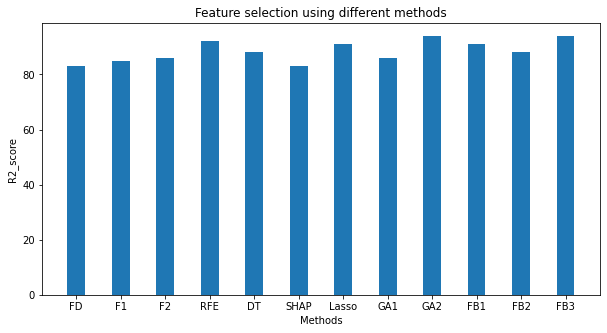

In [132]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(labels, R2_score,
        width = 0.4)
 
plt.xlabel("Methods")
plt.ylabel("R2_score")
plt.title("Feature selection using different methods")
plt.show()

In [133]:
import plotly.express as px
fig = px.bar(x=labels, y=R2_score)
fig.show()